In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/bmsAnomalyDetection/application/Anomaly-detection/notebook/data/labelled_data.csv')
df = df.drop(['Unnamed: 0','BMS_state'], axis=1)
pd.set_option('display.max_columns', None)
df.head()

timestamps    BMS_soc    BMS_soh  BMS_bus_voltage  \
0  2024-07-23 10:54:34.076000+05:30  95.000000  96.500000       443.800000   
1  2024-07-23 10:54:39.076000+05:30  95.000000  96.106415       443.996792   
2  2024-07-23 10:54:44.076000+05:30  95.000000  95.712831       444.193585   
3  2024-07-23 10:54:49.076000+05:30  95.094741  96.173705       445.763226   
4  2024-07-23 10:54:54.076000+05:30  95.192675  96.663373       447.379130   

   BMS_bus_current  BMS_isolation  BMS_max_cell_temp  BMS_max_cell_temp_id  \
0       223.300000         1190.0          29.300000                   1.0   
1       222.414435         1190.0          29.102313                   1.0   
2       221.528869         1190.0          28.904626                   1.0   
3       220.126256         1205.0          28.661967                   2.0   
4       218.706219         1205.0          28.418231                   2.0   

   BMS_min_cell_temp  BMS_min_cell_temp_id  BMS_max_cell_voltage  \
0          27.300000                   9.0              4.060000   
1          26.855204                   9.0              4.050116   
2          26.410408                   9.0              4.040231   
3          26.304787                   6.0              4.078085   
4          26.207293                   6.0              4.117083   

   BMS_max_cell_voltage_id  BMS_min_cell_voltage  BMS_min_cell_voltage_id  \
0                      7.0              3.920000                      5.0   
1                      7.0              3.885405                      5.0   
2                      7.0              3.850810                      5.0   
3                      8.0              3.850000                      5.0   
4                      8.0              3.850000                      5.0   

      LV_soc     LV_soh  LV_voltage  LV_current  LV_temperature  \
0  82.700000  96.200000   10.000000    0.900000            73.0   
1  85.220510  96.051735   11.482653    0.751735            73.0   
2  87.741020  95.903469   12.965306    0.603469            73.0   
3  88.038033  95.519148   13.000000    0.600000            62.0   
4  88.281769  95.129170   13.000000    0.600000            62.0   

   MCU_motor_speed  MCU_motor_avg_temp  OBC_mux  OBC_port_status  \
0      4301.600000           37.700000      0.0              0.0   
1      4154.866780           38.688435      0.0              0.0   
2      4008.133560           39.676871      0.0              0.0   
3      4073.967475           38.747870      0.0              0.0   
4      4144.894647           37.772926      0.0              0.0   

   OBC_overvoltage_fault  OBC_overcurrent_fault  OBC_output_voltage  \
0                    0.0                    0.0          348.000000   
1                    0.0                    0.0          345.059976   
2                    0.0                    0.0          342.119953   
3                    0.0                    0.0          344.309767   
4                    0.0                    0.0          346.717781   

   OBC_output_current  OBC_port_weld_fault  OBC_internal_voltage  \
0          212.000000                  0.0            345.000000   
1          251.200314                  0.0            343.009653   
2          290.400627                  0.0            341.019306   
3          291.076093                  0.0            339.028960   
4          290.112888                  0.0            337.038613   

   OBC_internal_current  Anomaly  Anomaly_Score  
0            143.000000        0     301.415981  
1            161.410708        0     -47.702002  
2            179.821416        0      30.631203  
3            198.232124        0       5.399433  
4            216.642832        0     255.746391

In [3]:
df['timestamps'] = pd.to_datetime(df['timestamps'])
df['hour'] = df['timestamps'].dt.strftime('%H')

In [29]:
df['BMS_max_cell_temp_id'] = df['BMS_max_cell_temp_id'].astype('object')
df['BMS_min_cell_temp_id'] = df['BMS_min_cell_temp_id'].astype('object')
df['BMS_max_cell_voltage_id'] = df['BMS_max_cell_voltage_id'].astype('object')
df['BMS_min_cell_voltage_id'] = df['BMS_min_cell_voltage_id'].astype('object')
df['OBC_mux'] = df['OBC_mux'].astype('object')
df['OBC_port_status'] = df['OBC_port_status'].astype('object')
df['OBC_overvoltage_fault'] = df['OBC_overvoltage_fault'].astype('object')
df['OBC_overcurrent_fault'] = df['OBC_overcurrent_fault'].astype('object')
df['OBC_port_weld_fault'] = df['OBC_port_weld_fault'].astype('object')

char = ['BMS_max_cell_temp_id',
        'BMS_min_cell_temp_id',
        'BMS_max_cell_voltage_id',
        'BMS_min_cell_voltage_id',
        ]

num = ['BMS_soc',
       'BMS_soh',
       'BMS_bus_voltage',
       'BMS_bus_current',
       'BMS_isolation',
       'BMS_max_cell_temp',
       'BMS_min_cell_temp',
       'BMS_max_cell_voltage',
       'BMS_min_cell_voltage',
       'LV_soc','LV_soh',
       'LV_voltage',
       'LV_current',
       'LV_temperature',
       'MCU_motor_speed',
       'MCU_motor_avg_temp',
       'OBC_output_voltage',
       'OBC_output_current',
       'OBC_internal_voltage',
       'OBC_internal_current']

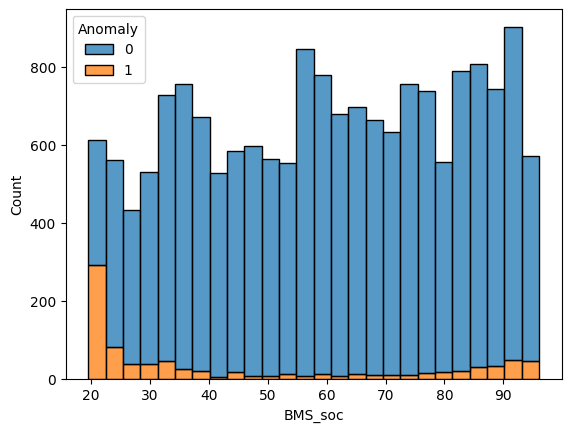

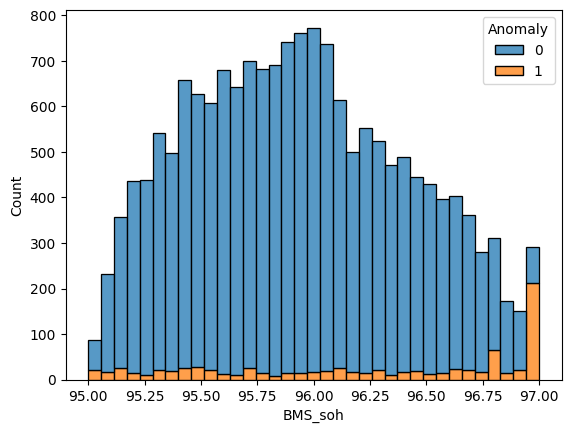

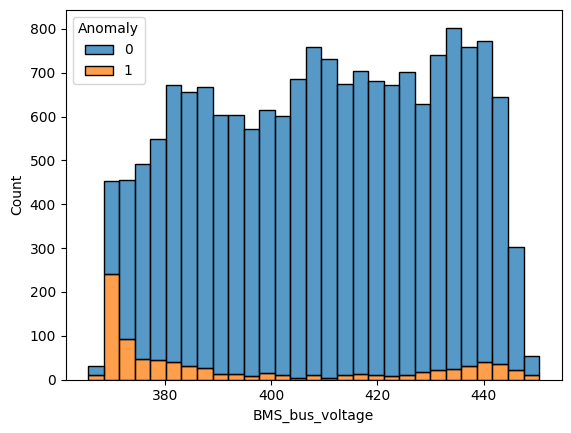

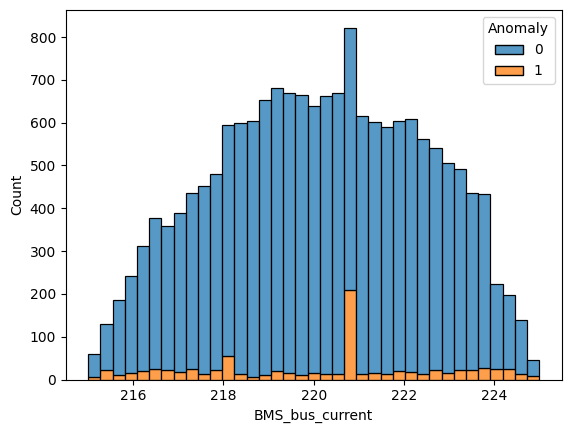

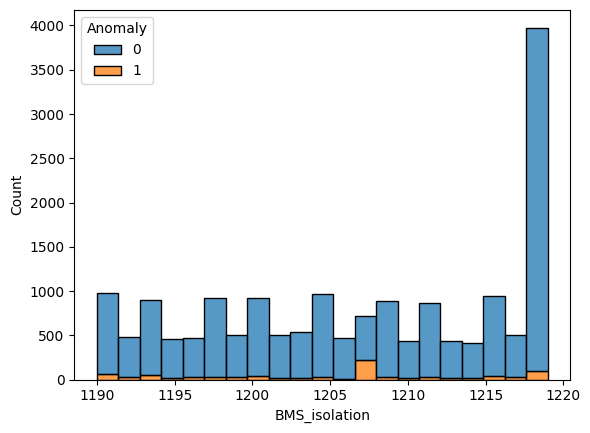

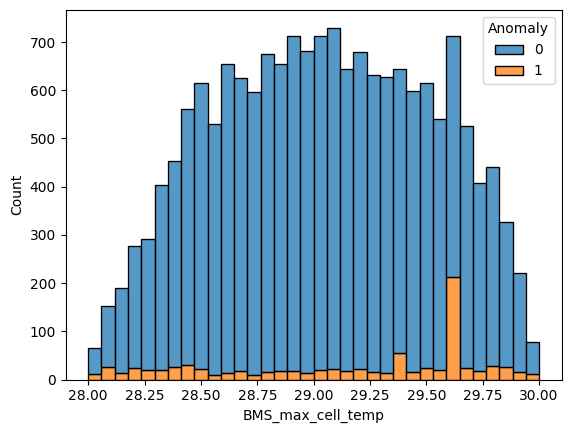

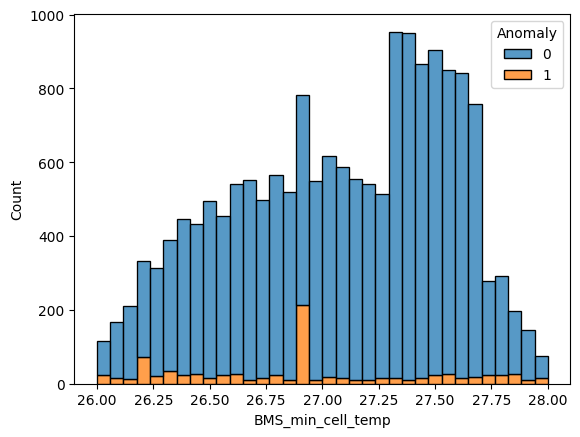

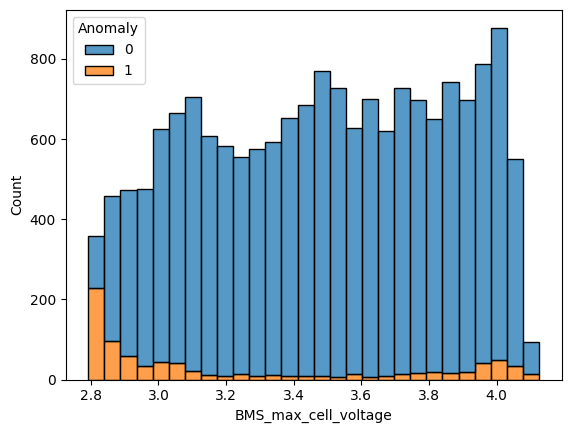

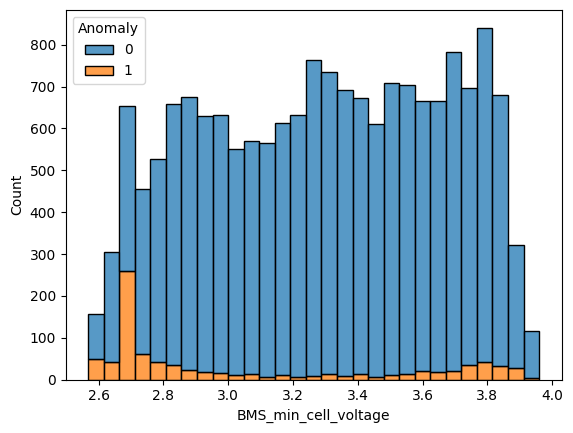

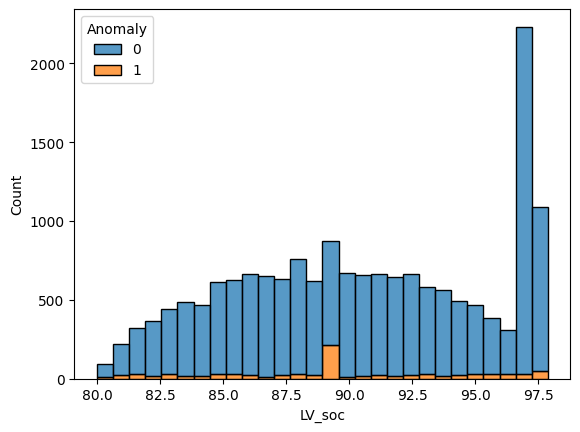

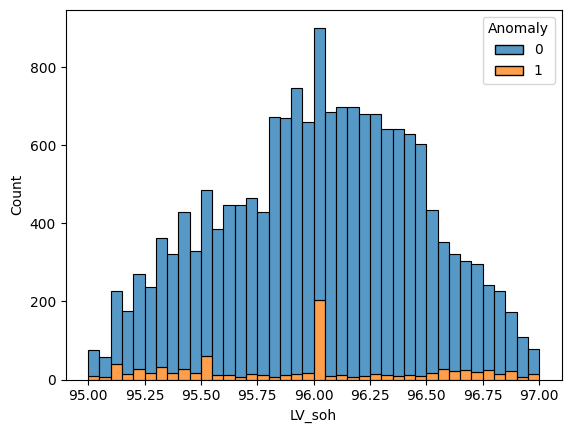

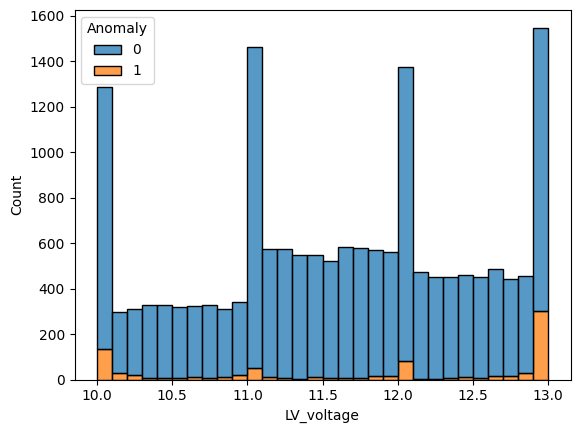

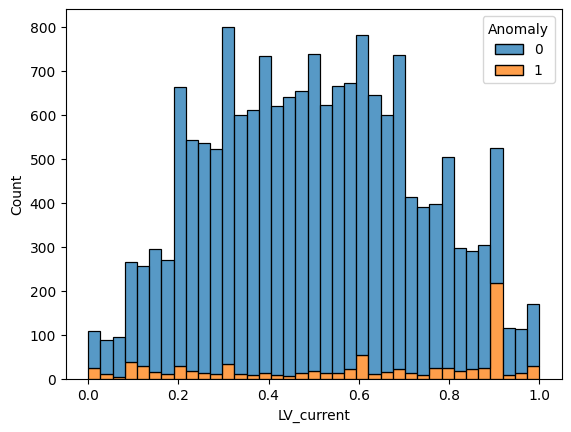

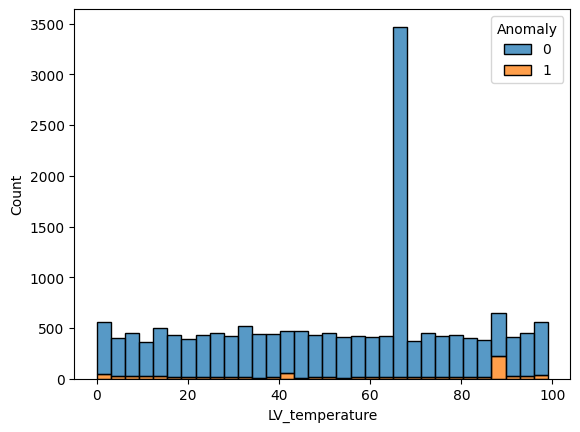

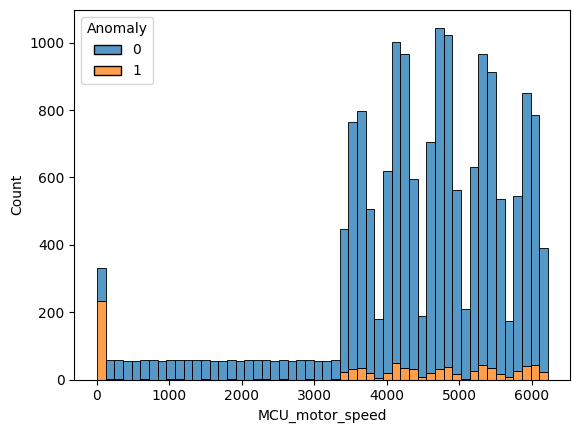

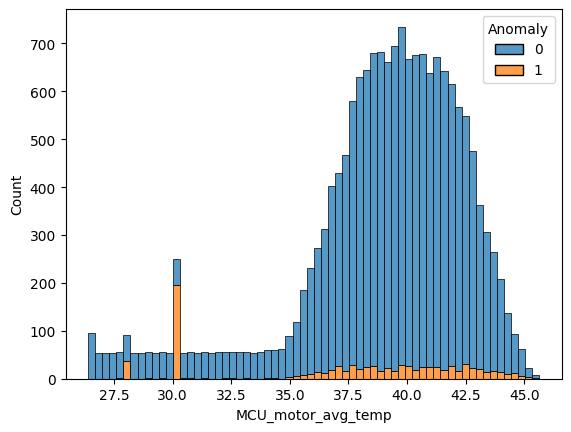

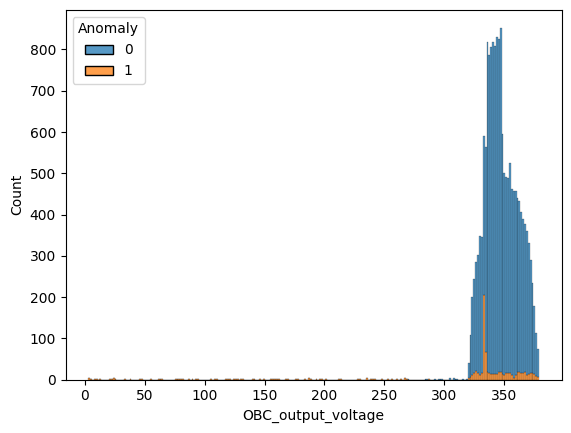

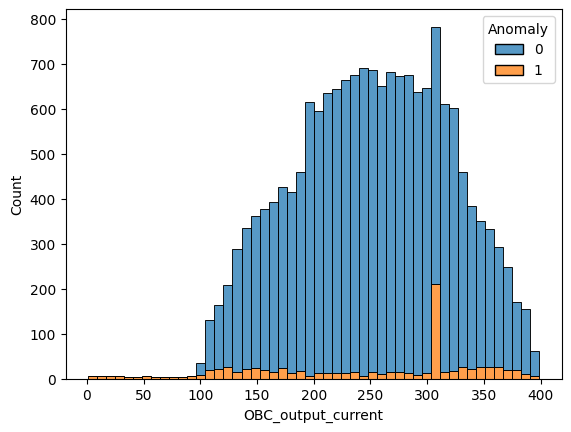

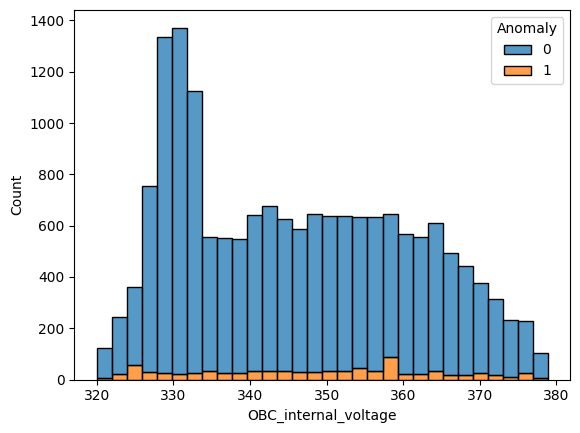

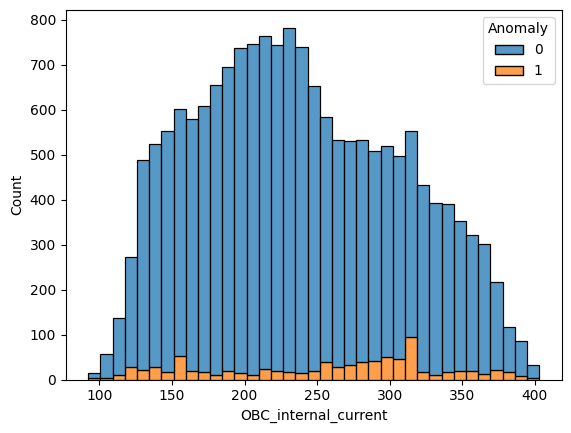

In [6]:
for i in num:
        sns.histplot(data=df,x=df[i],hue='Anomaly',multiple='stack')
        plt.show()

In [ ]:
# No particular pattern can be identified in following parameters wrt to Anomal
# BMS_isolation
# BMS_max_cell_temp,
# BMS_min_cell_temp,
# LV_soc
# LV_soh
# OBC_internal_voltage

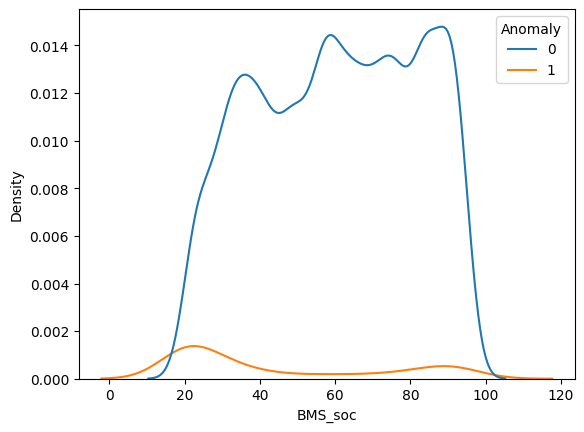

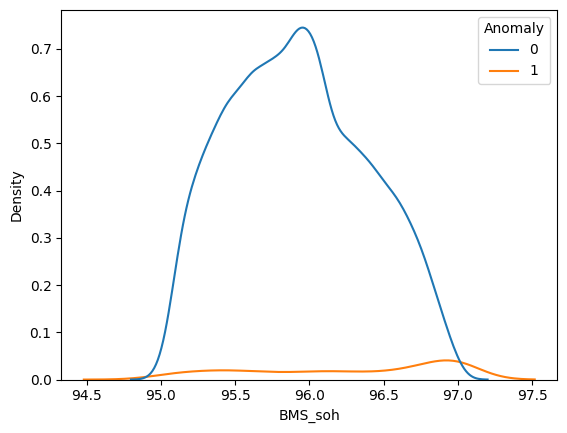

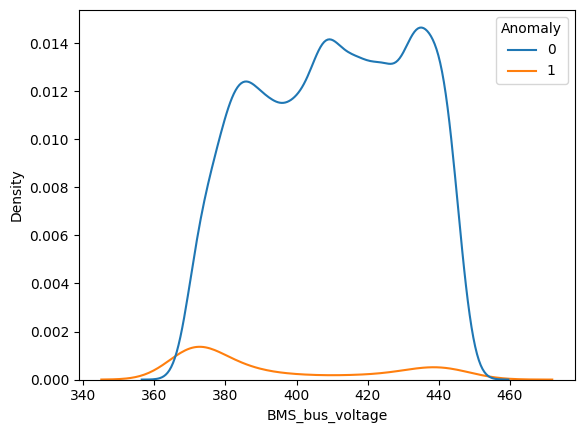

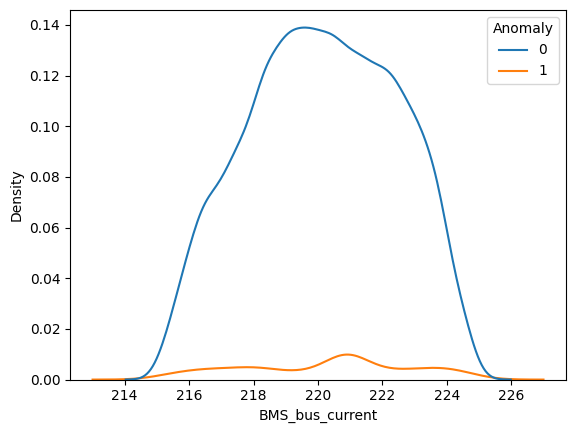

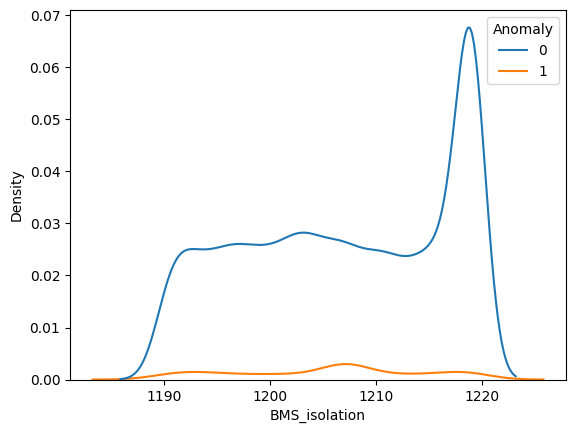

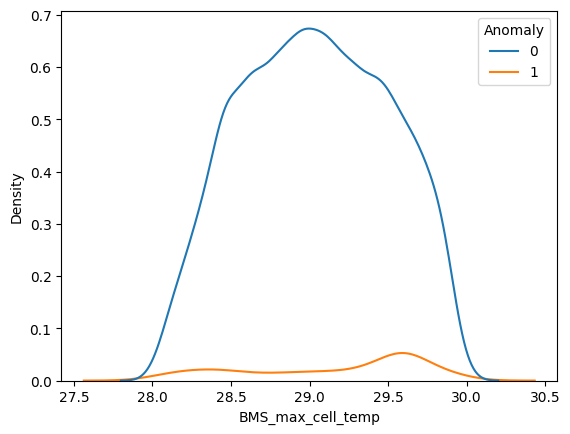

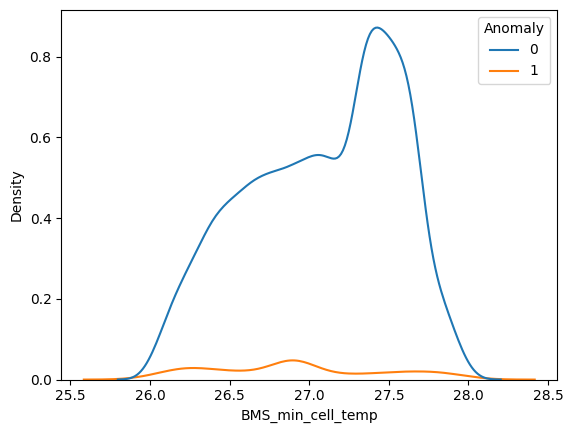

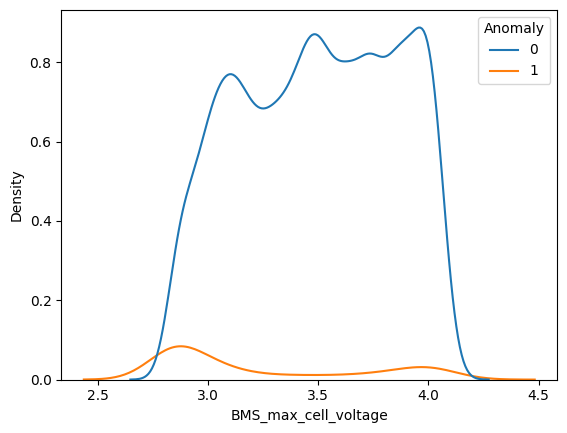

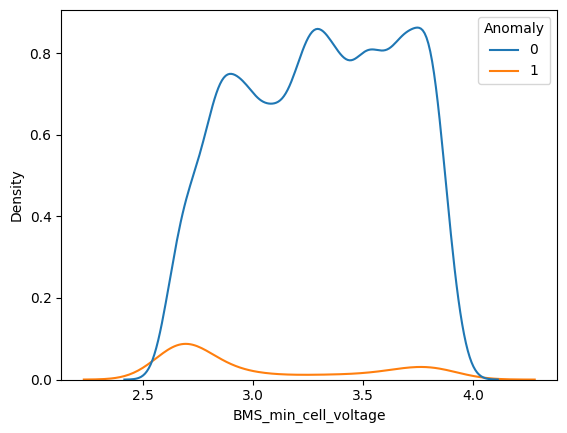

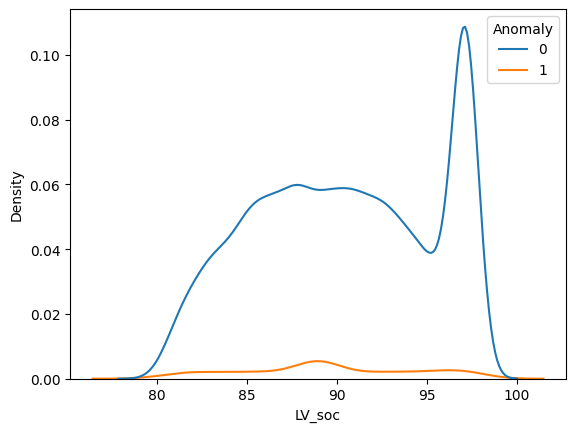

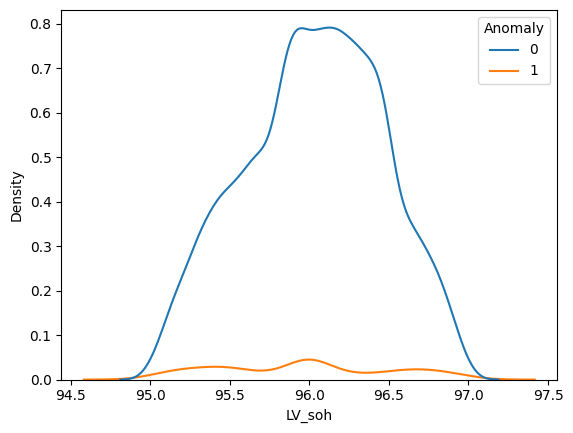

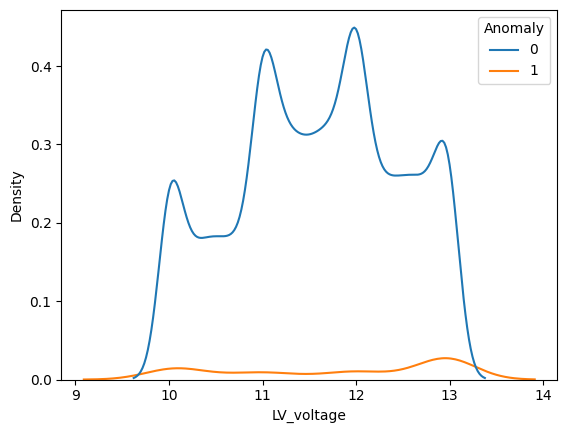

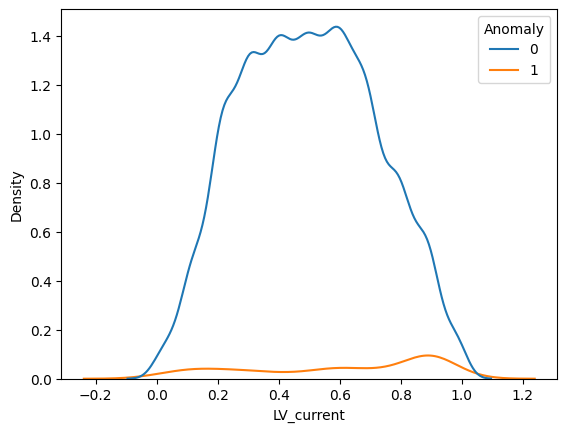

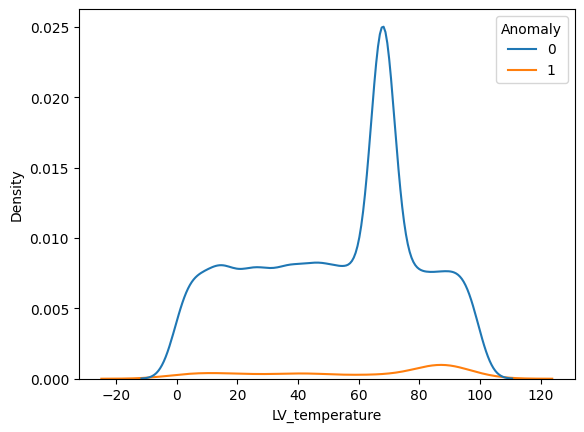

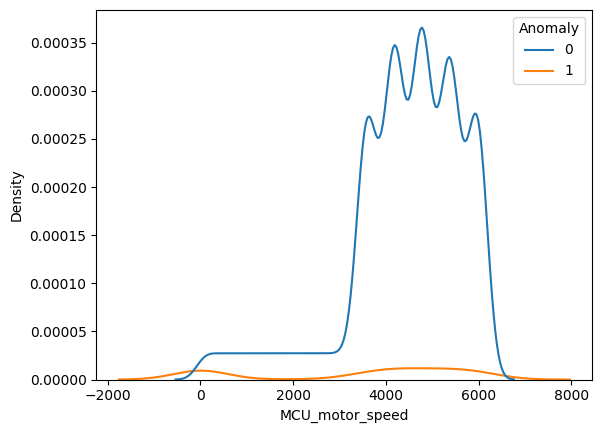

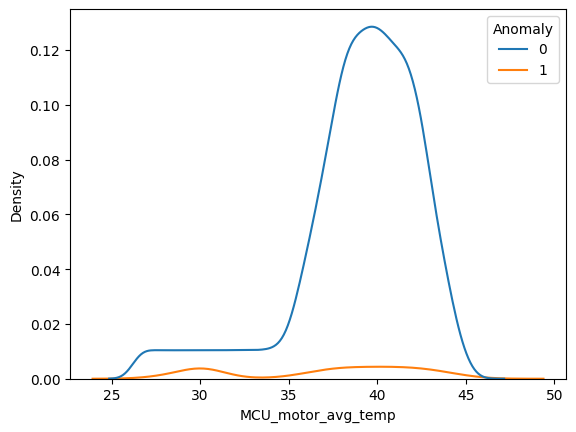

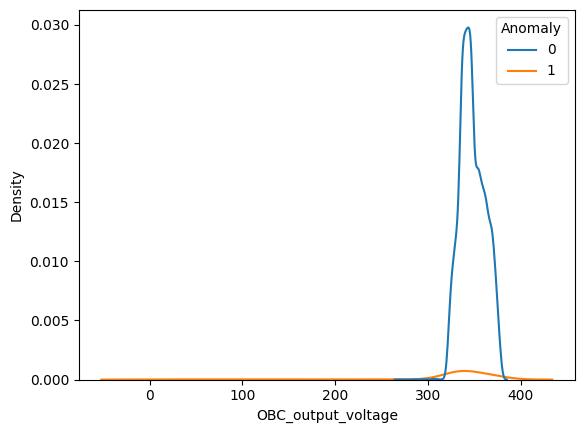

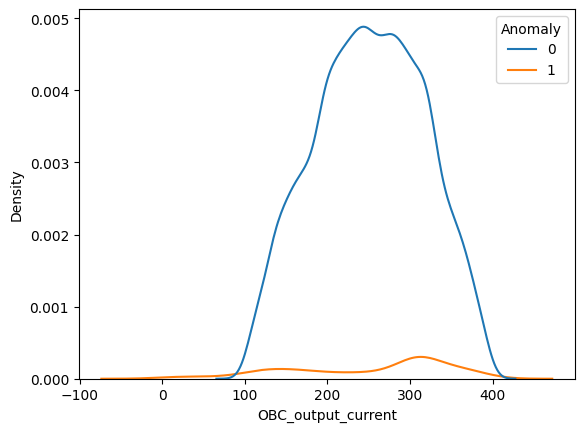

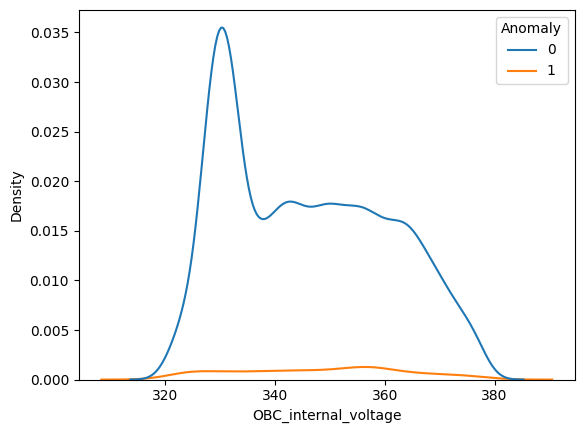

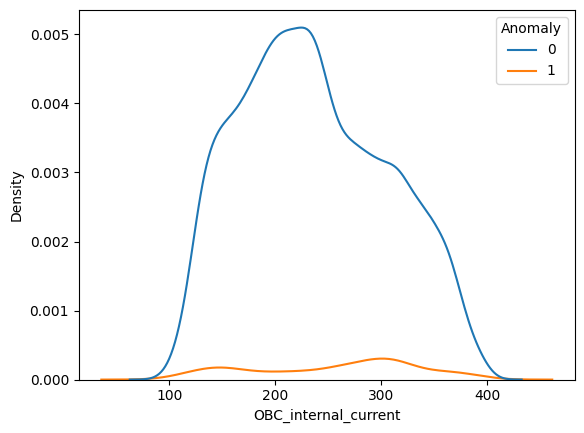

In [7]:
for i in num:
        sns.kdeplot(data=df,x=df[i],hue='Anomaly',)
        plt.show()

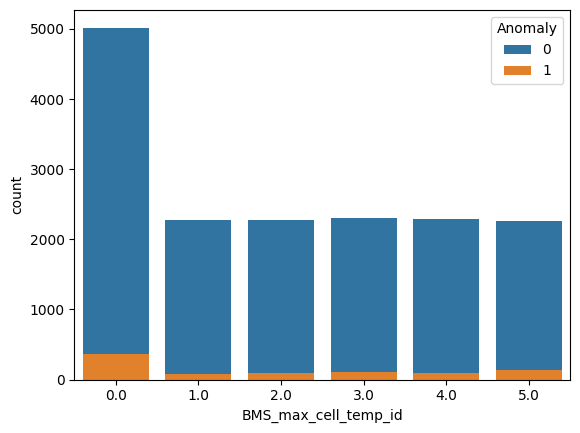

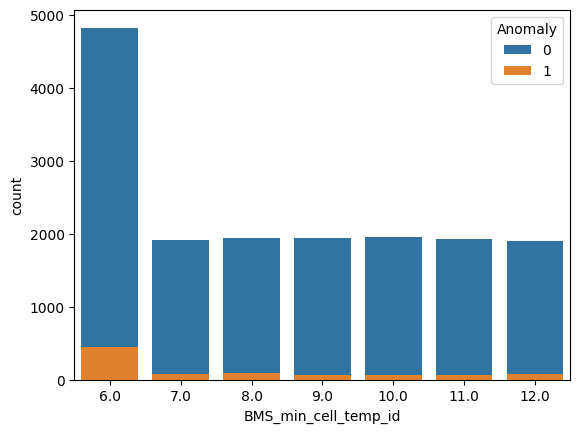

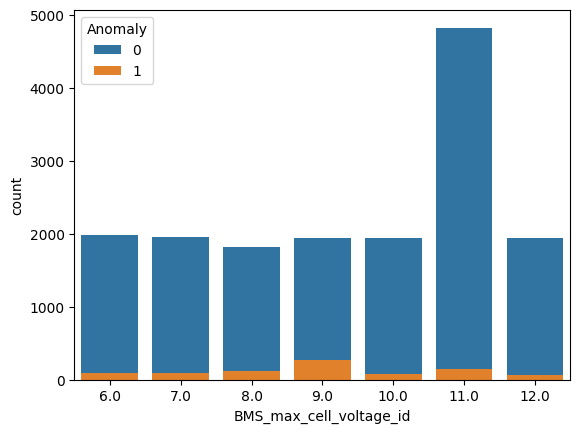

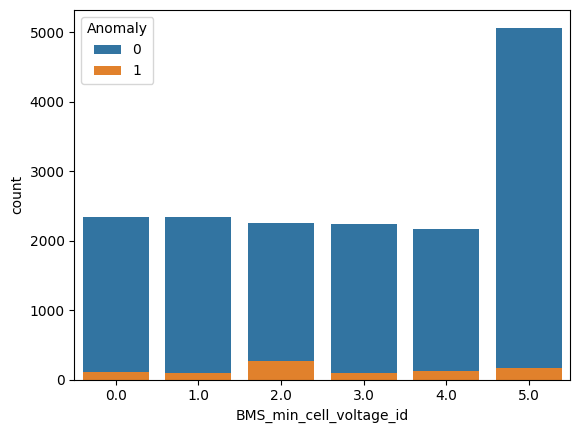

In [30]:
for i in char:
        sns.countplot(x=i,hue='Anomaly', data=df,dodge=False)
        plt.show()

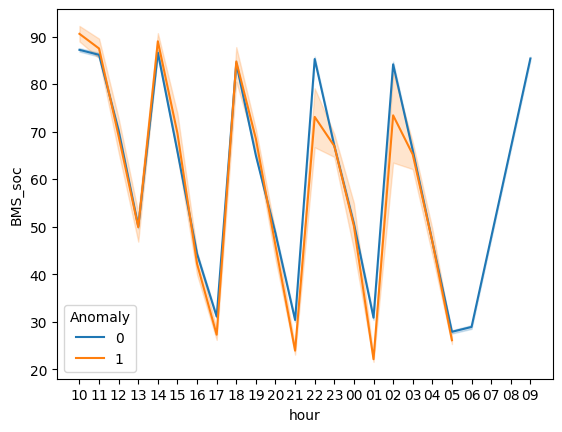

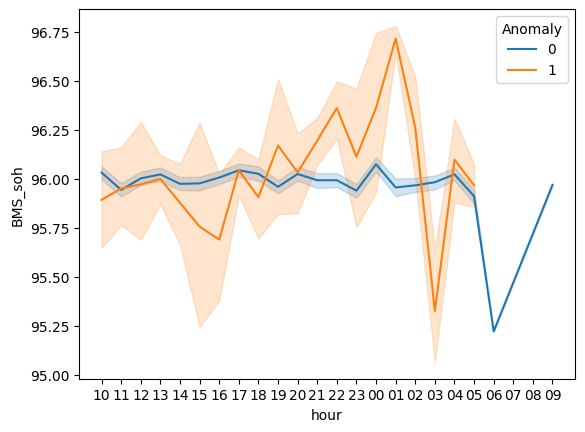

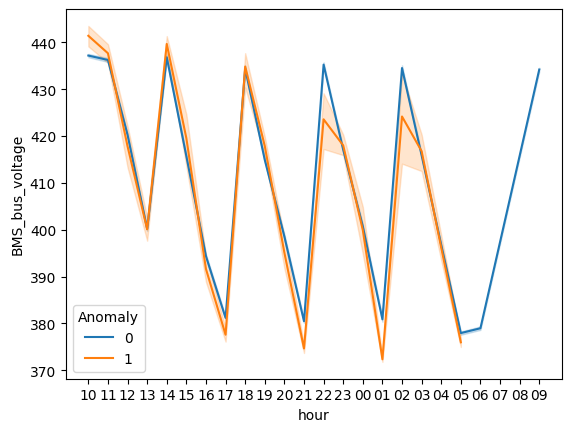

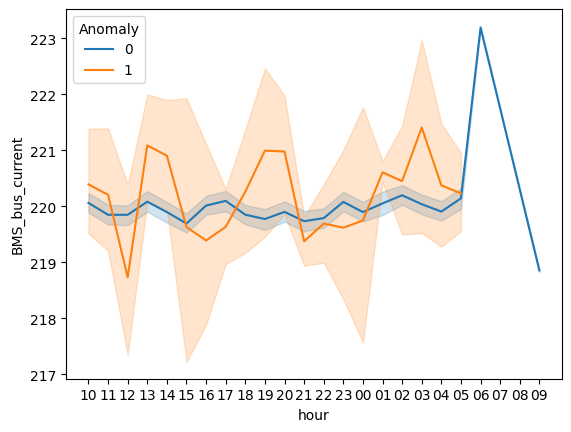

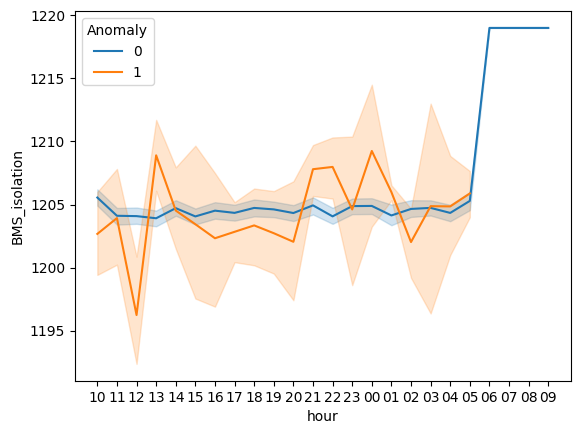

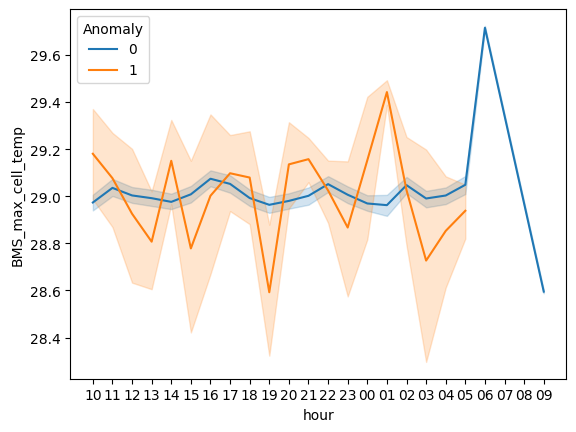

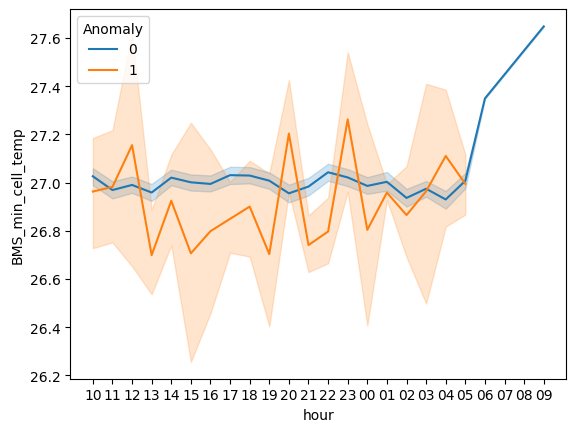

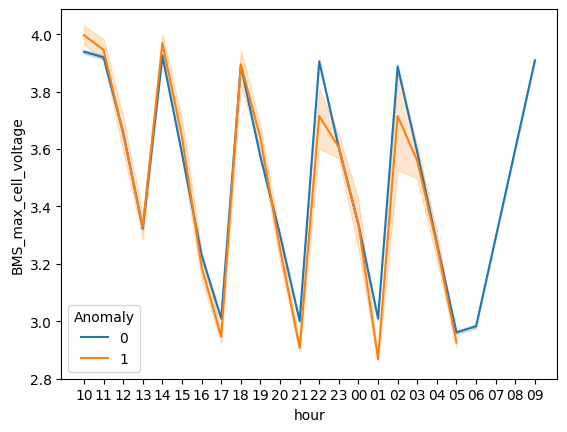

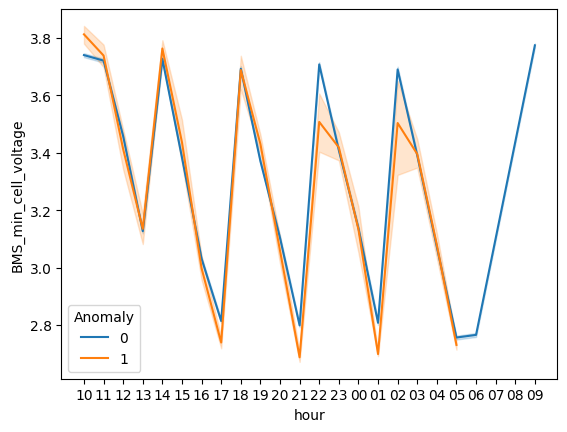

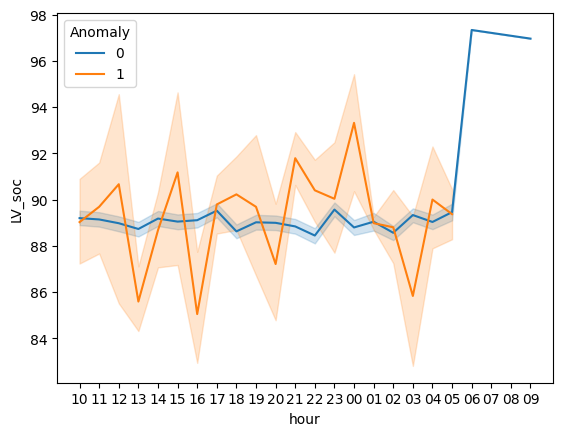

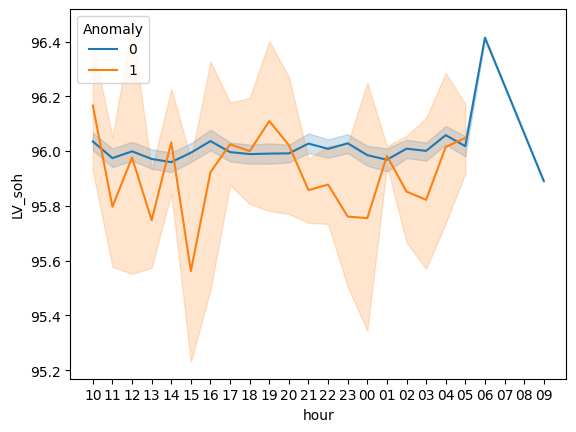

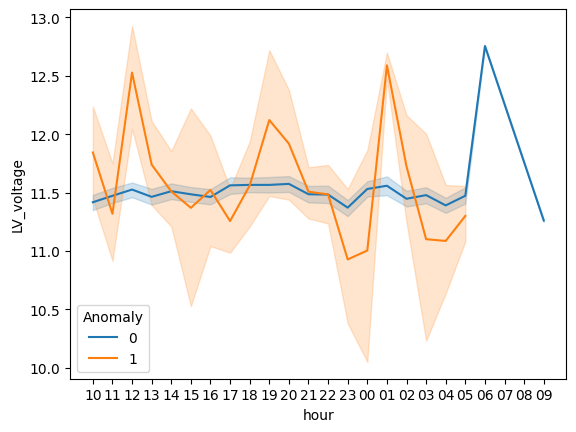

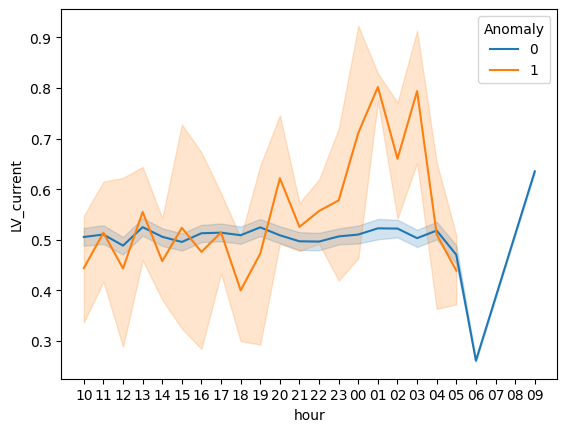

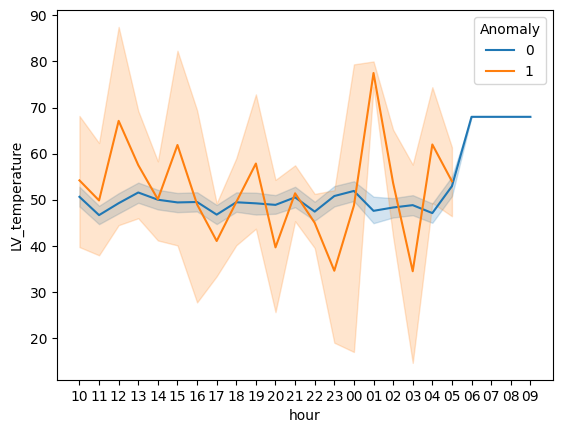

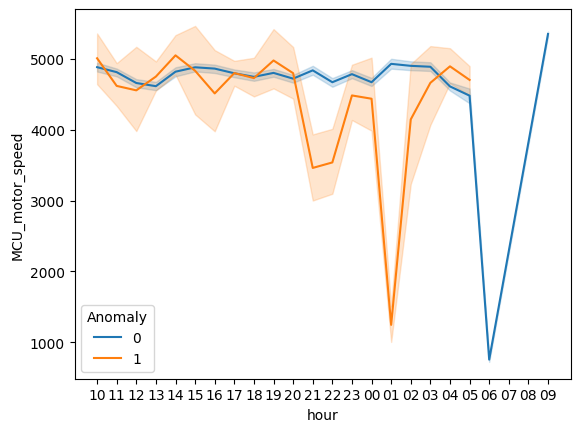

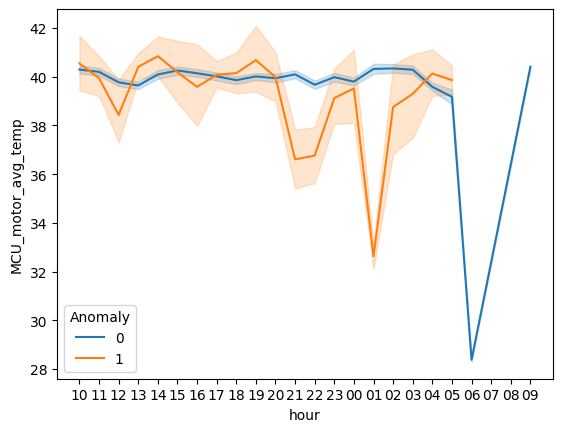

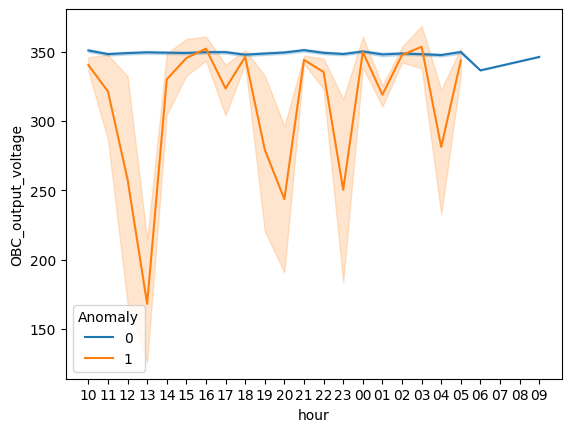

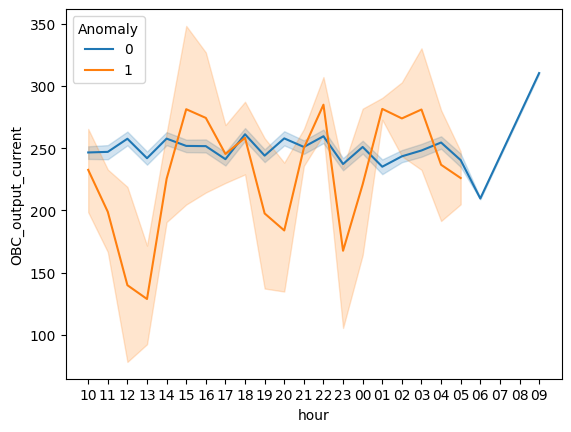

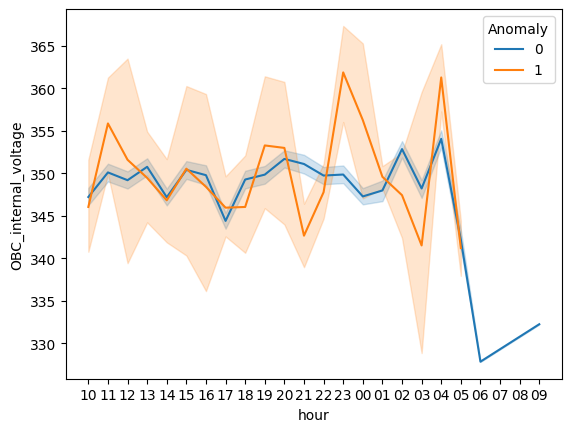

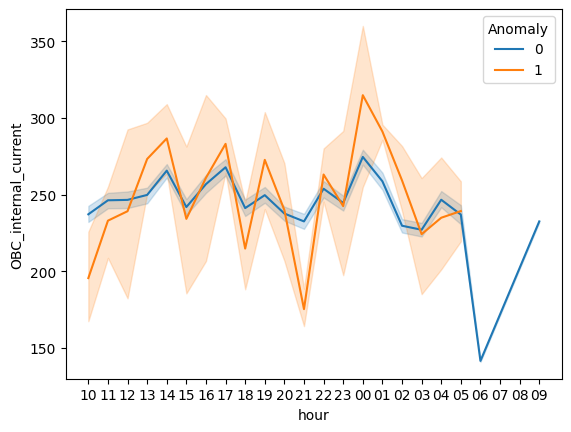

In [46]:
for i in num:
    sns.lineplot(x=df['hour'],y=i, data=df, hue='Anomaly',)
    plt.show()

<AxesSubplot:xlabel='hour', ylabel='OBC_internal_current'>

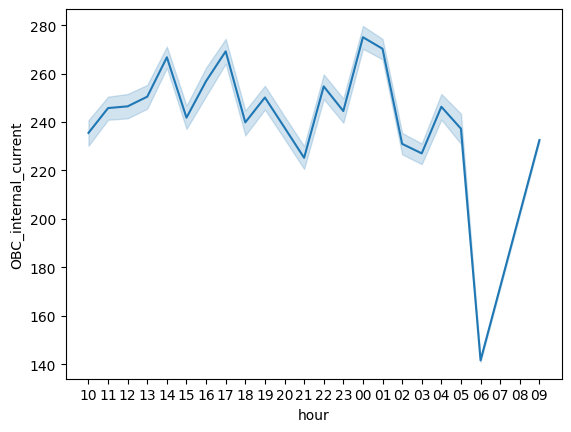

In [16]:
sns.lineplot(data=df,y='OBC_internal_current',x='hour')

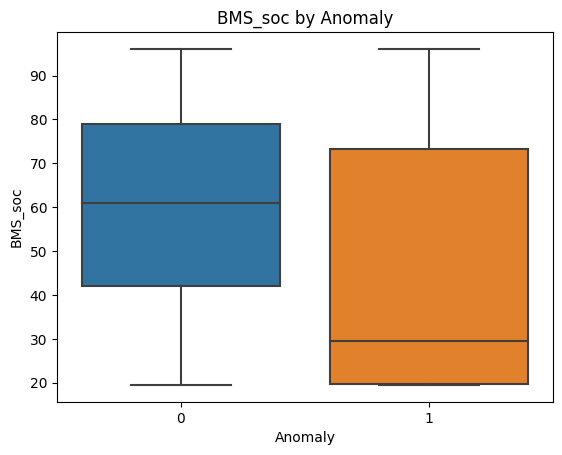

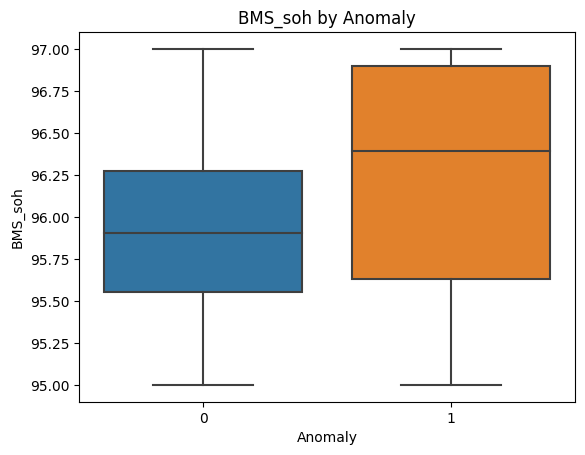

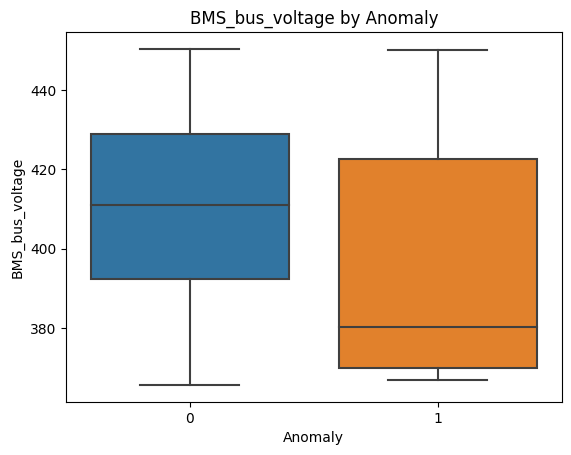

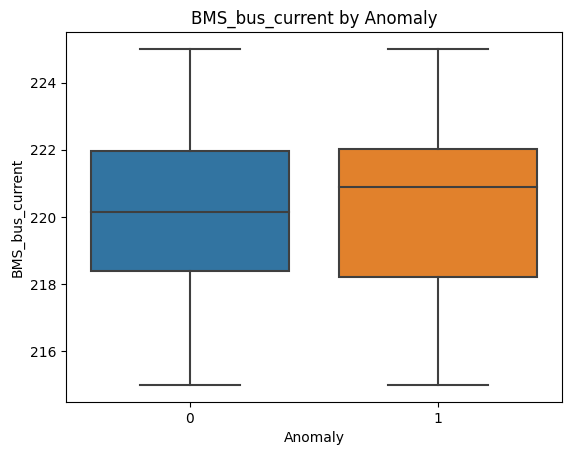

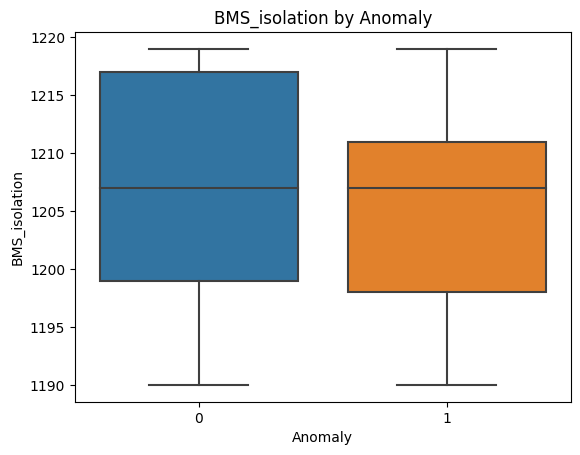

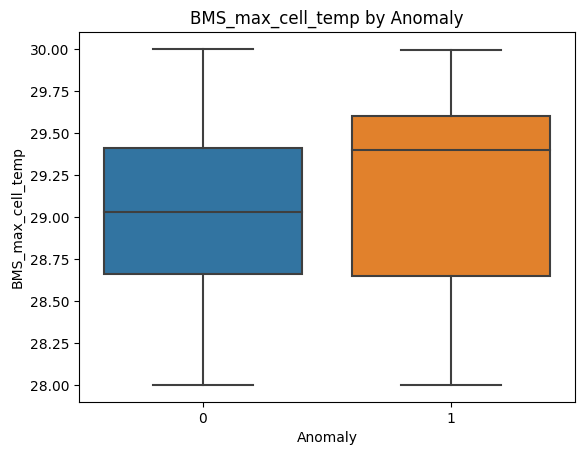

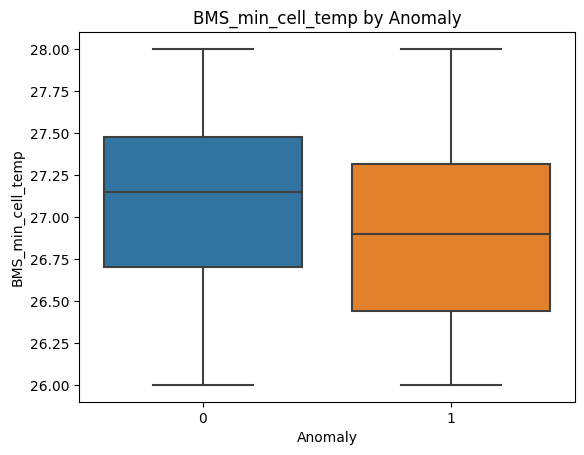

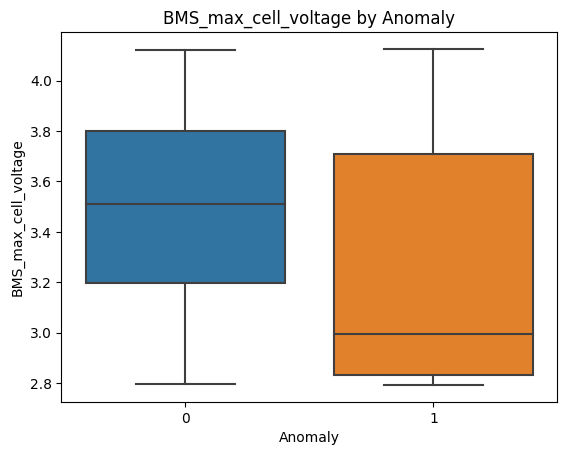

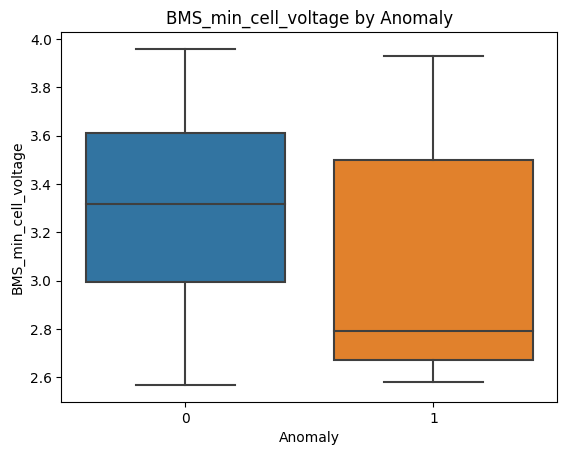

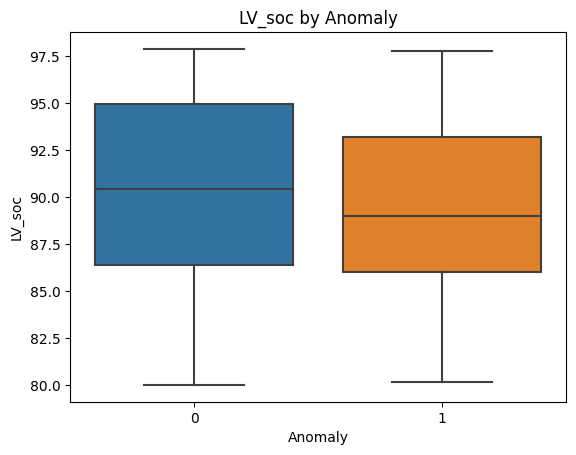

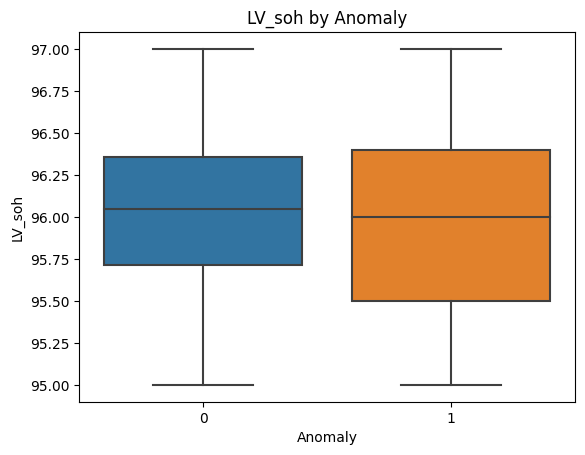

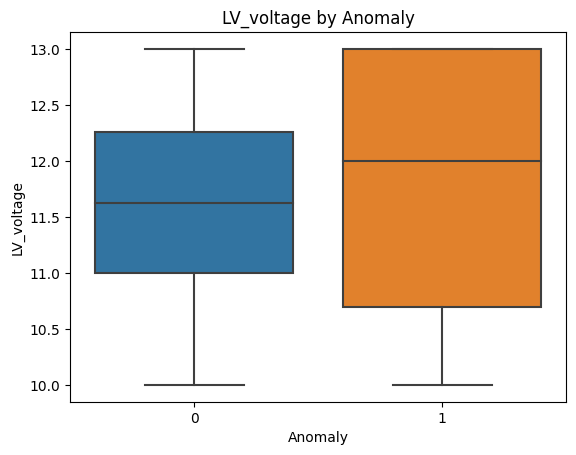

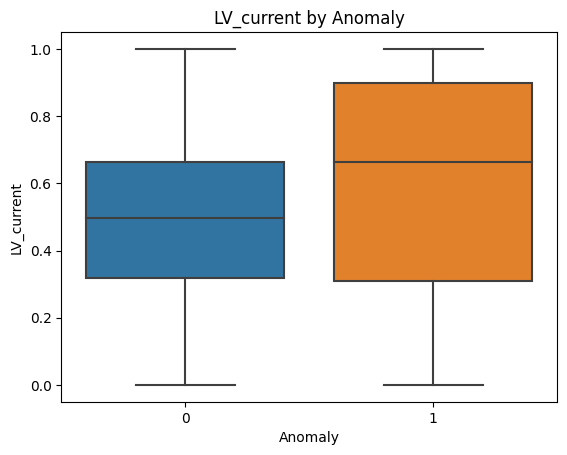

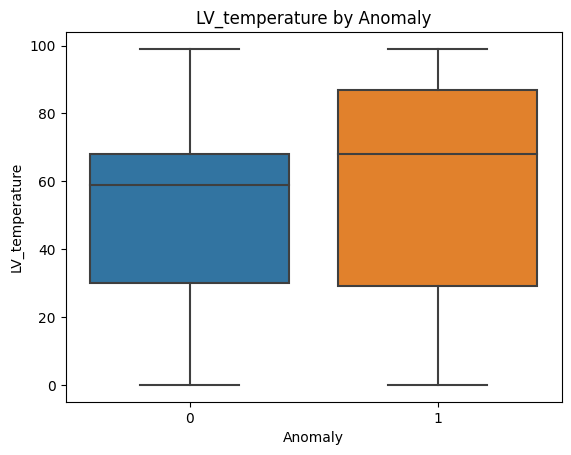

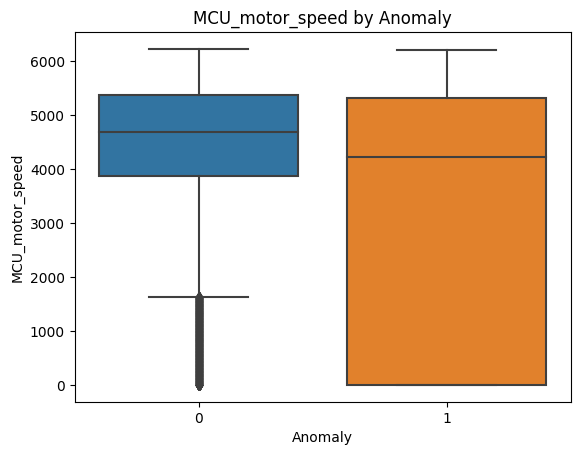

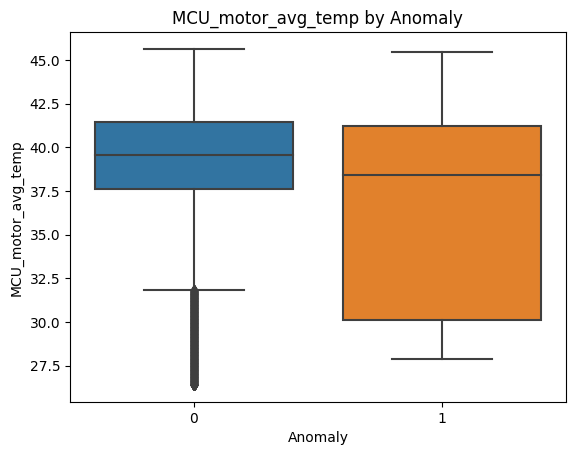

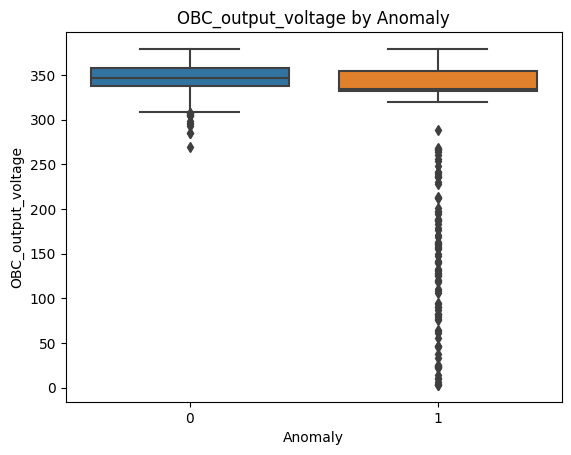

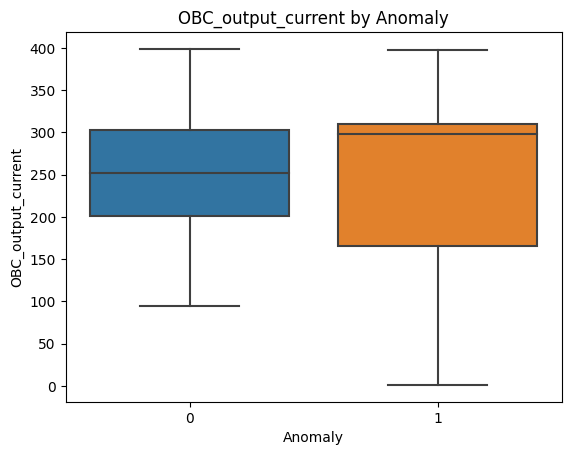

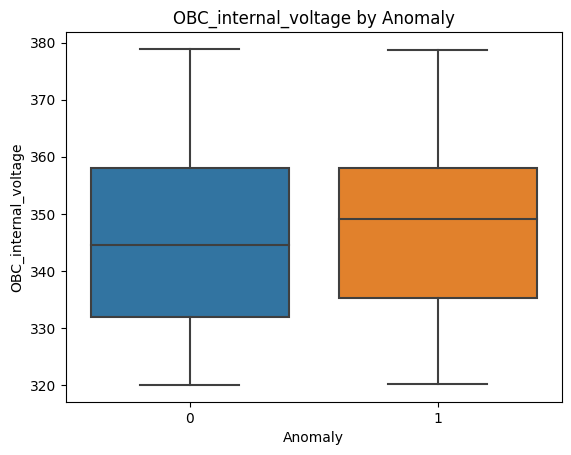

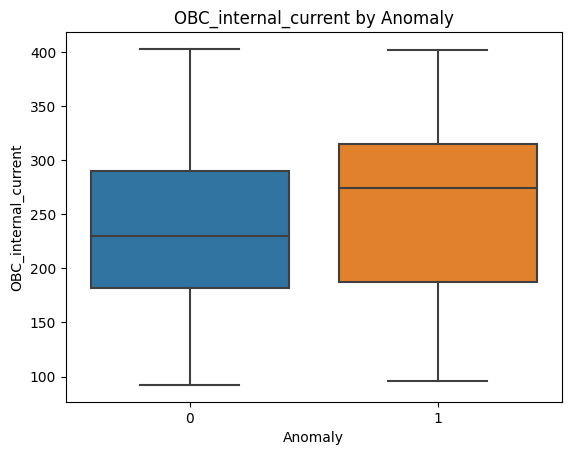

In [33]:
for i in num:
    sns.boxplot(x='Anomaly', y=i, data=df)
    plt.title(f'{i} by Anomaly')
    plt.xlabel('Anomaly')
    plt.ylabel(i)
    plt.show()


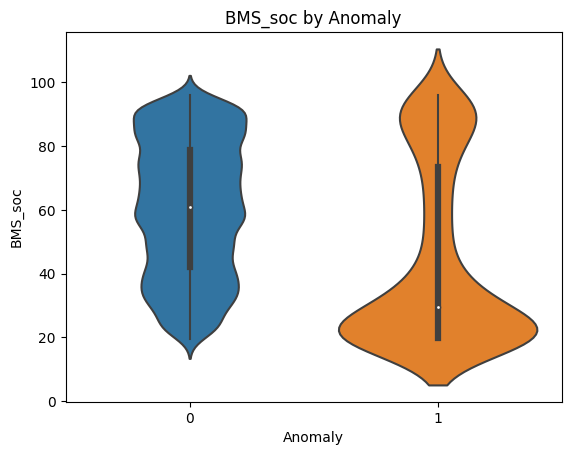

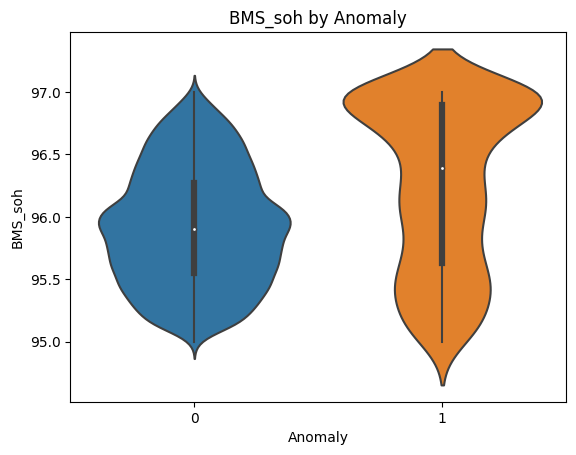

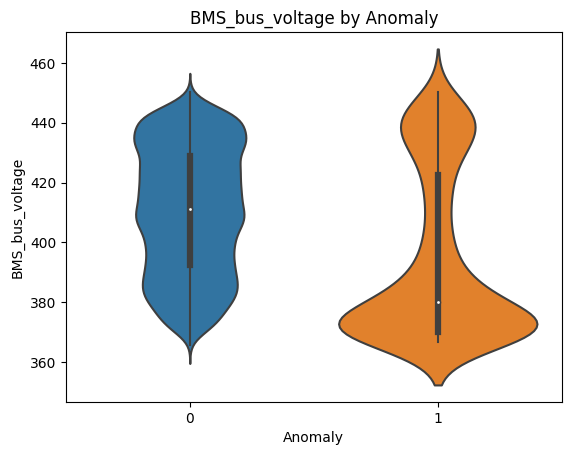

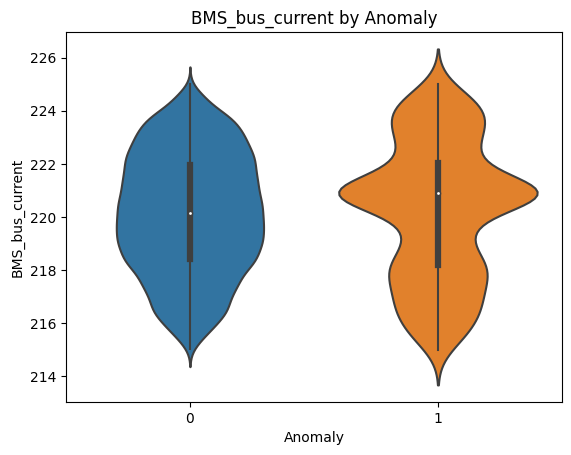

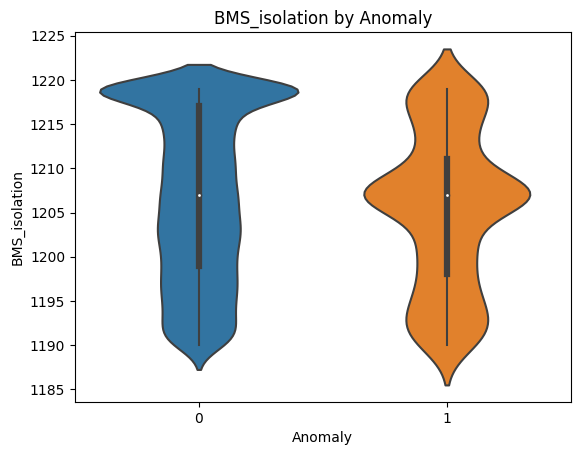

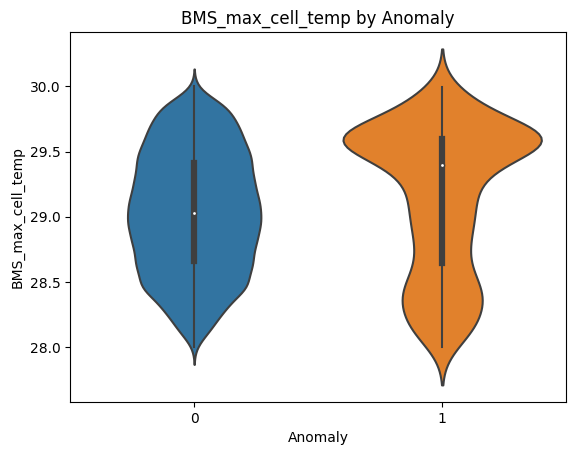

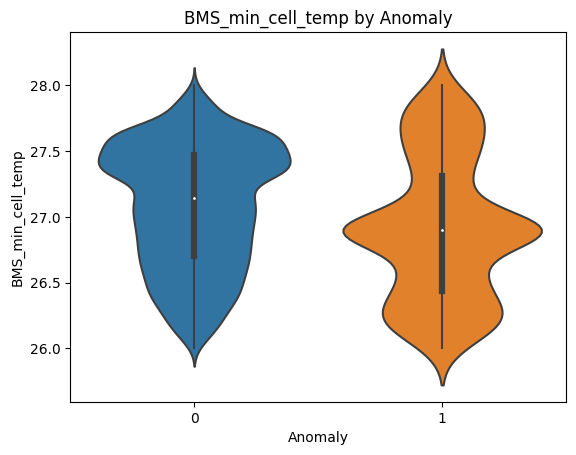

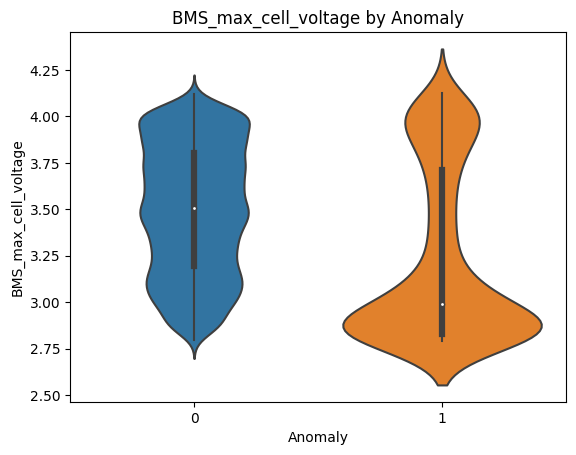

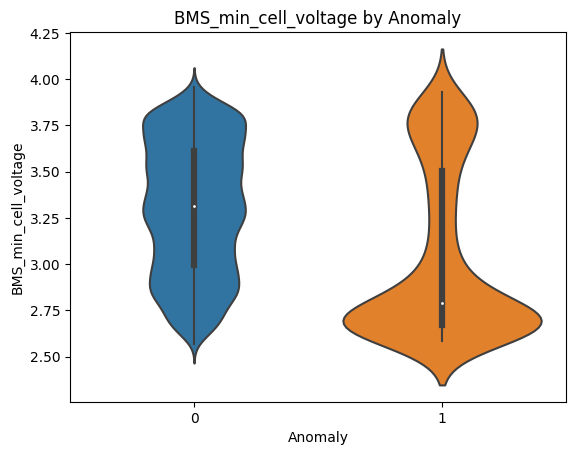

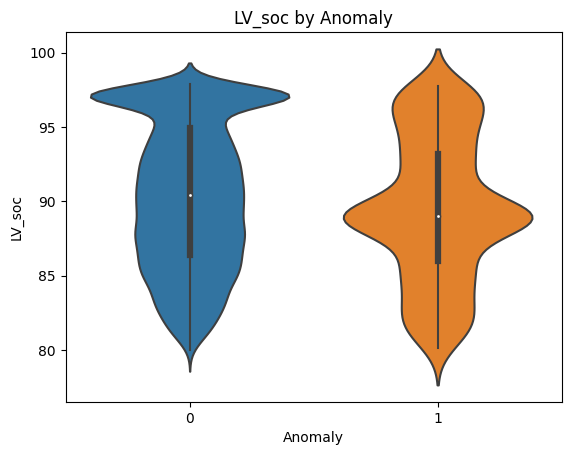

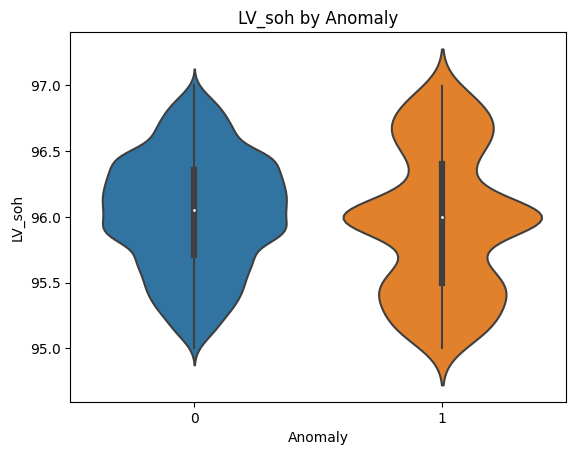

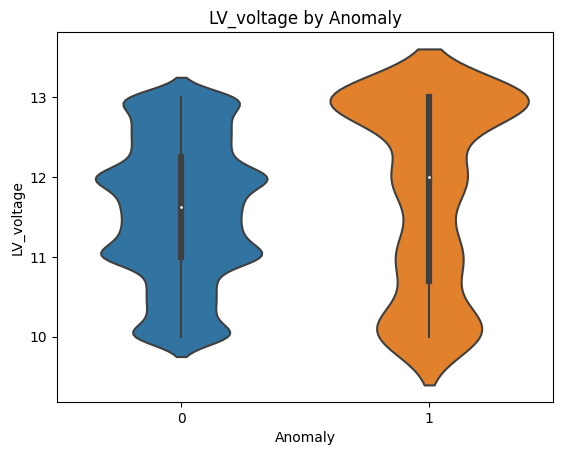

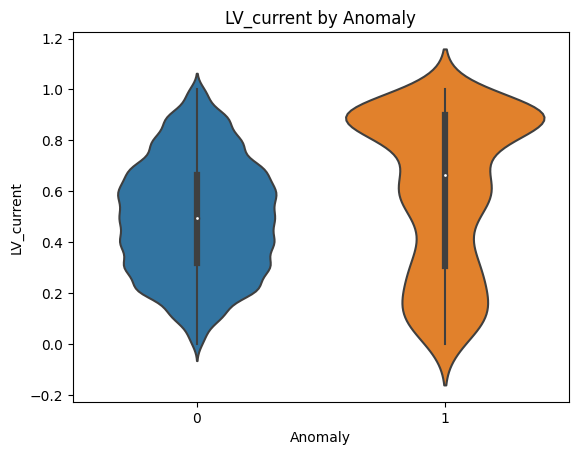

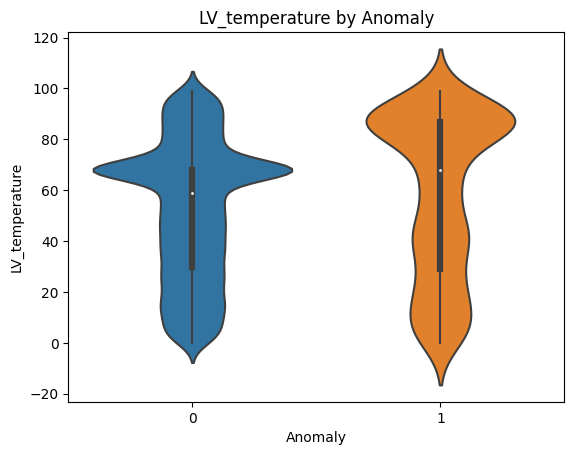

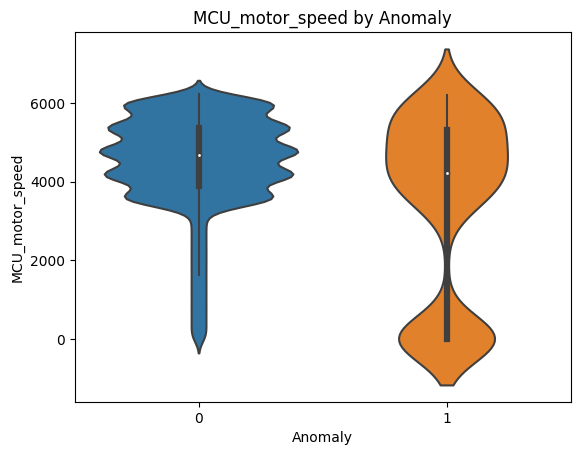

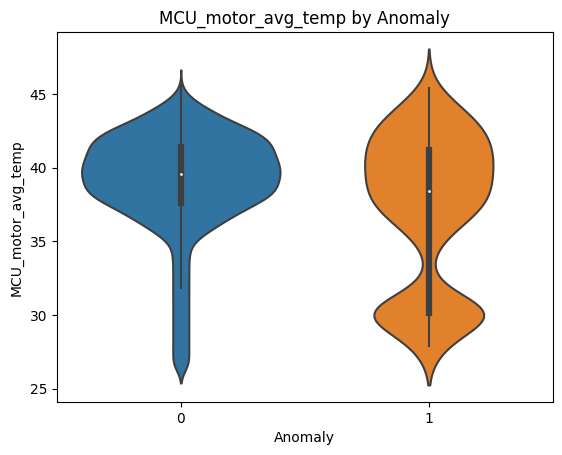

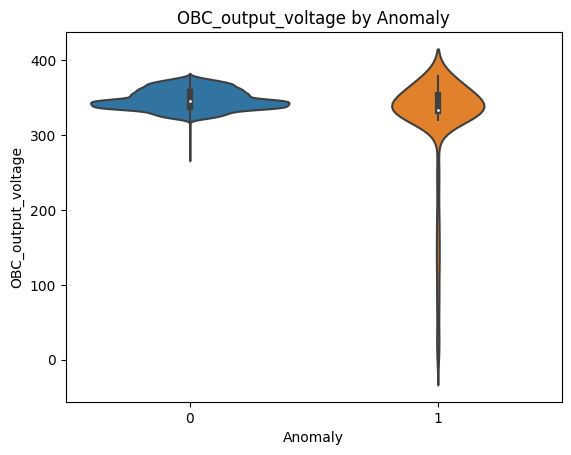

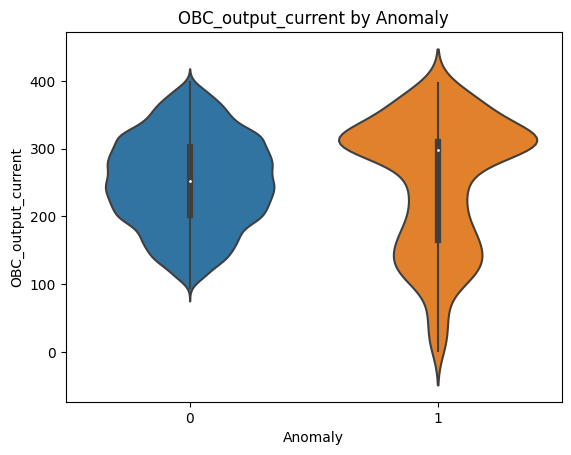

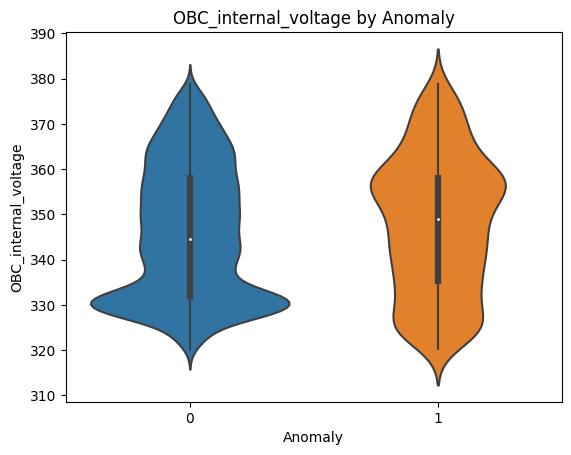

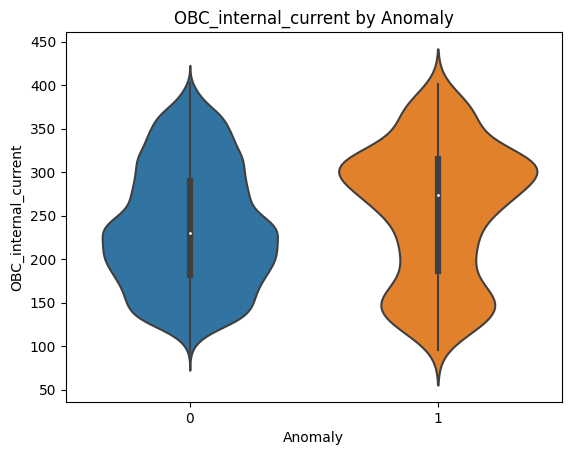

In [34]:
for i in num:
    sns.violinplot(x='Anomaly', y=i, data=df)
    plt.title(f'{i} by Anomaly')
    plt.xlabel('Anomaly')
    plt.ylabel(i)
    plt.show()

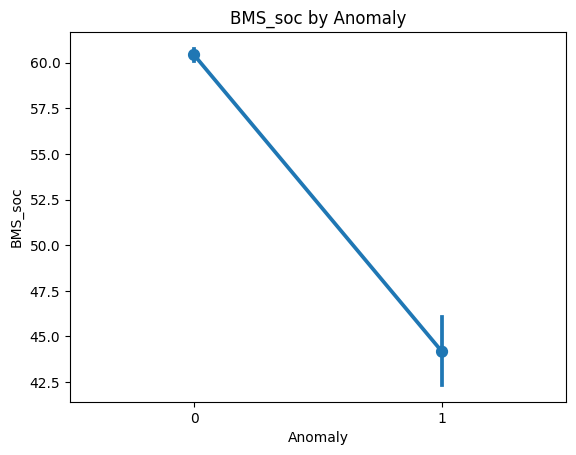

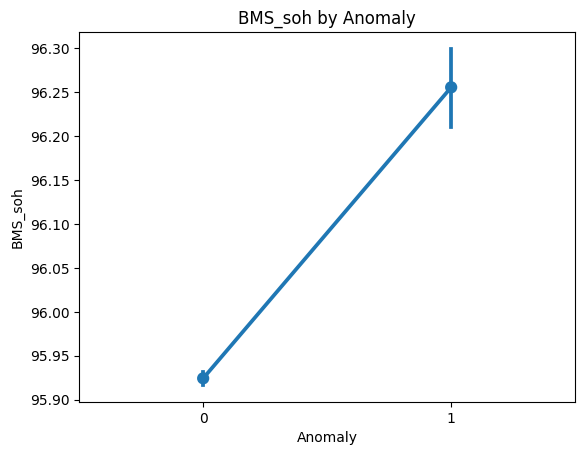

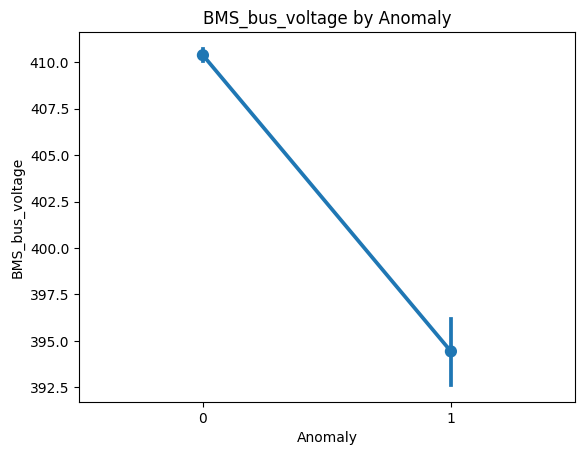

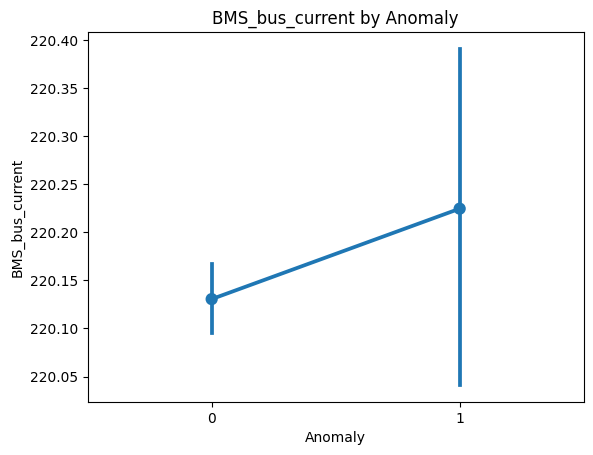

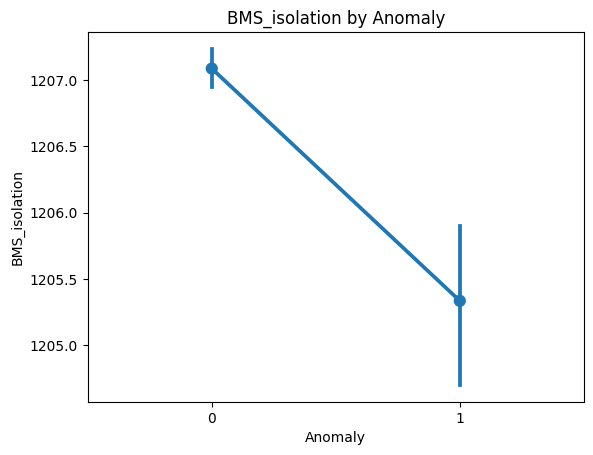

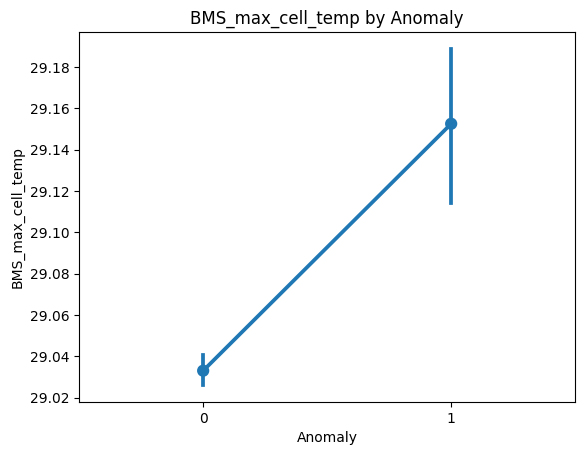

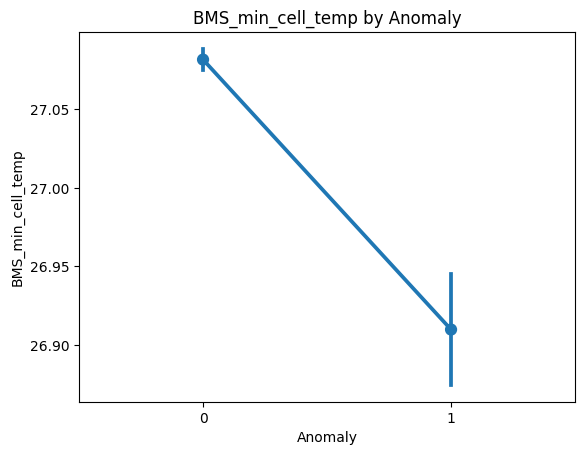

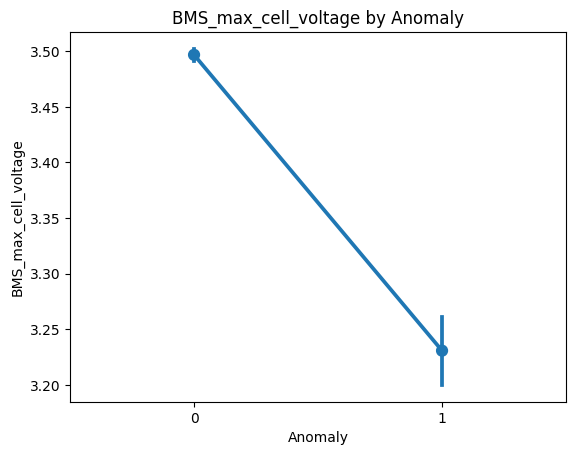

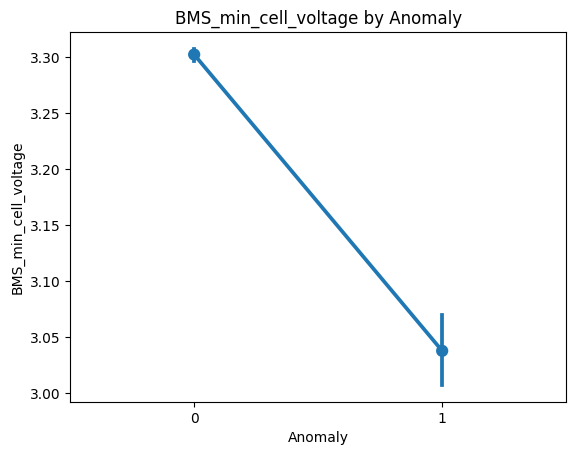

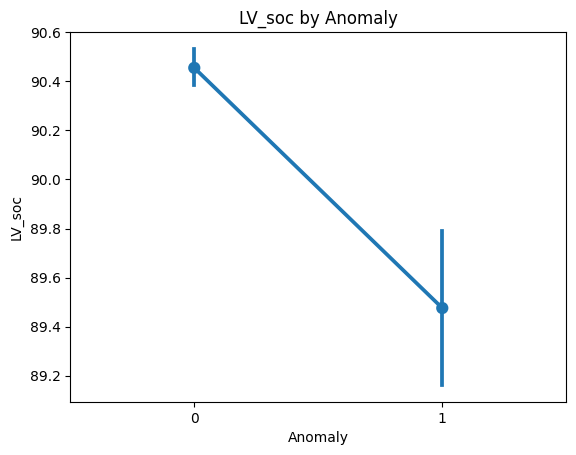

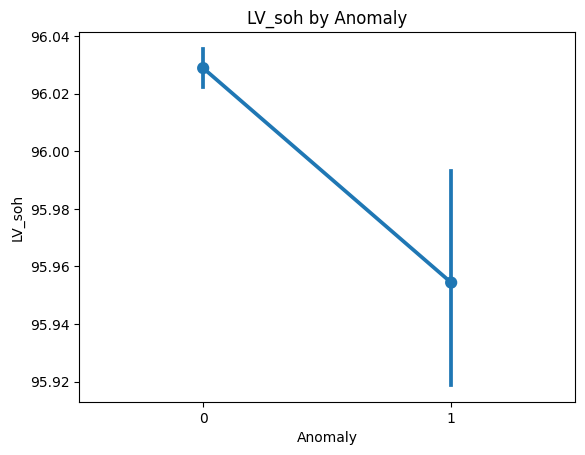

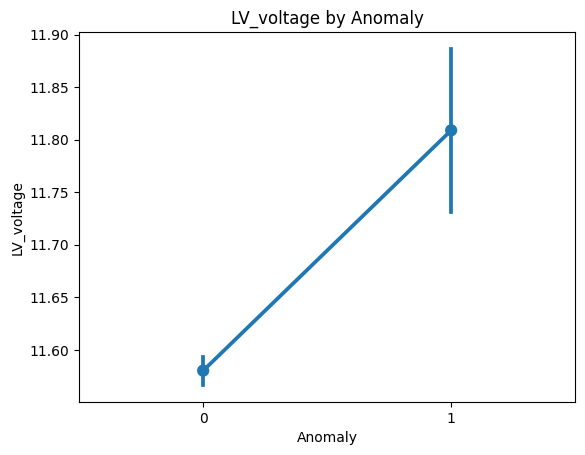

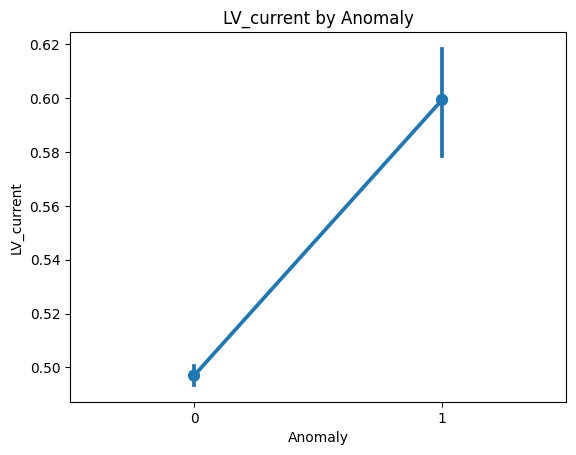

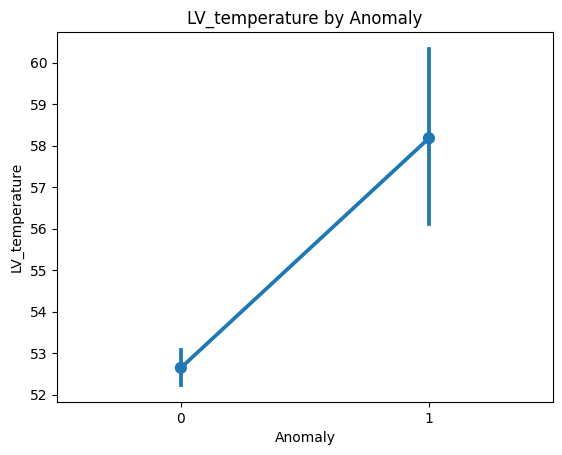

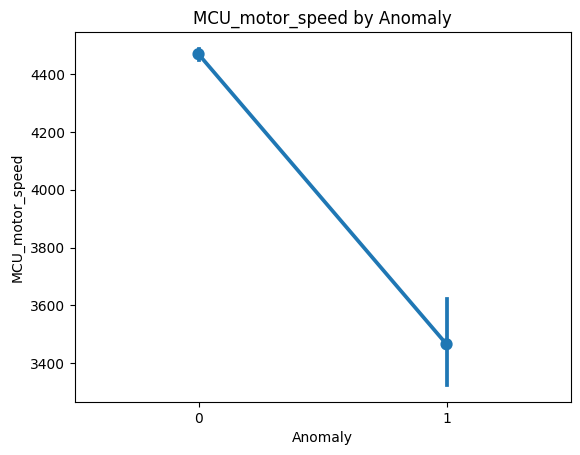

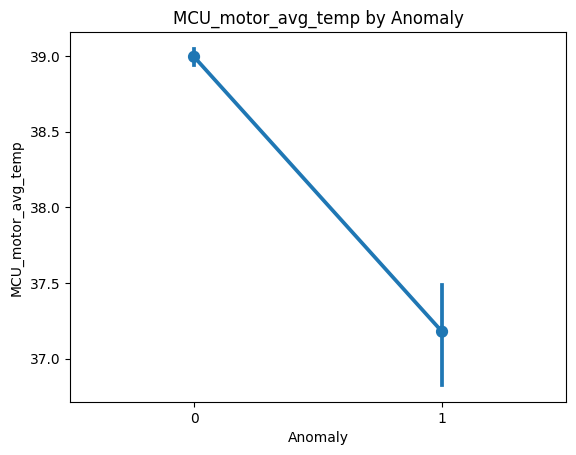

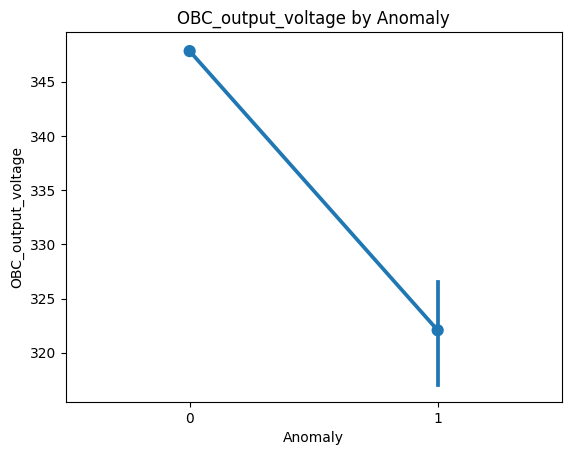

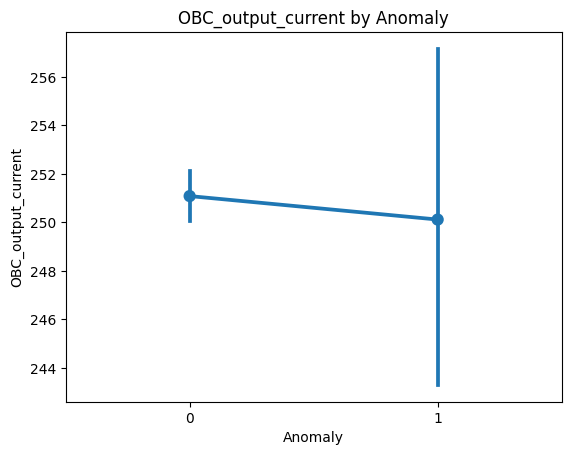

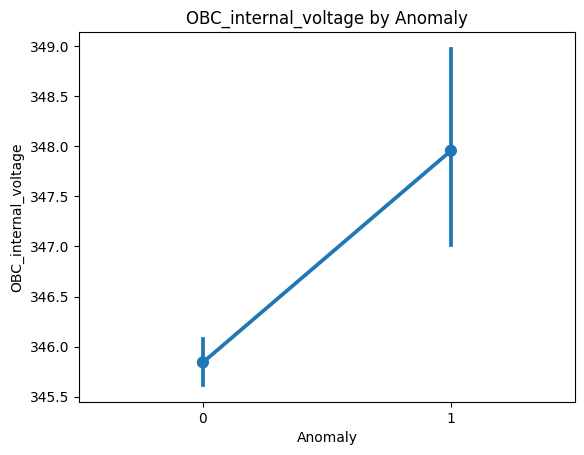

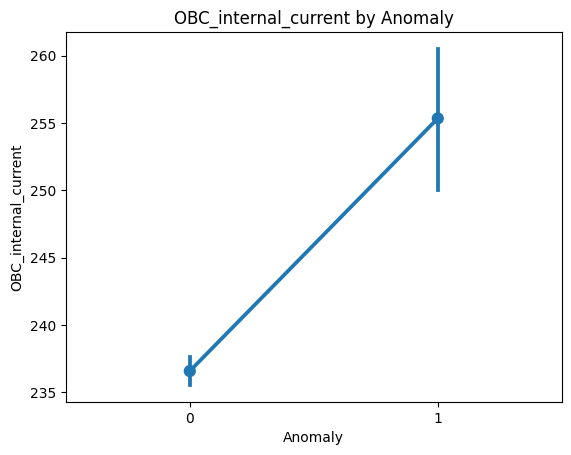

In [35]:
for i in num:
    sns.pointplot(x='Anomaly', y=i, data=df)
    plt.title(f'{i} by Anomaly')
    plt.xlabel('Anomaly')
    plt.ylabel(i)
    plt.show()